In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import matplotlib as mtl
import numpy as np
import scipy

import consts
import input_output
import image_processing
import plotting
import signal_processing
import filters

In [2]:
info = input_output.load(input_output.EXAMPLE_FILE)
# info = input_output.load('/home/s233039/Desktop/KU/data/79/microelectrode_experiments/2_10uA 10 trials.tiff')
def empty_dicts():
    return {current:[] for current in input_output.SHOWCASE_CURRENTS}, {current:[] for current in input_output.SHOWCASE_CURRENTS}

## A

In [5]:
def add_scale(ax, res_x):
    origin = (0.05, 0.08)
    thickness = 0.005
    pixels = int(50/res_x)

    length = pixels/(32*8)

    rect = ptch.Rectangle(origin, width=length, height=thickness, color="white", transform=ax.transAxes)
    ax.add_patch(rect)

In [6]:
def grid_exmaple(cell_type:str):
    image = image_processing.get_image(info[cell_type], cell_type)
    fig, ax = plt.subplots(1, 2, dpi = 500, layout = "compressed")
    ax[0].imshow(image)

    grid_size = consts.DEFAULT_GRID_SIZE
    color = "white"
    linewidth = 0.2
    ax[1].imshow(image)
    for i, j in plotting.rois_indices(image.shape, grid_size):
        rect = ptch.Rectangle((j*grid_size, i*grid_size), grid_size, grid_size, edgecolor = color, facecolor = 'none', linewidth = linewidth)
        ax[1].add_patch(rect)

    # Zoom rectangle
    rects = 5
    rect = ptch.Rectangle((10*grid_size, 10*grid_size), rects*grid_size, rects*grid_size, edgecolor = 'yellow', facecolor = 'none', linewidth = 1)
    ax[1].add_patch(rect)

    add_scale(ax[0], info['x'])

    for a in ax:
        a.set_axis_off()

    # nasa.plotting.save_fig(fig, 2, f"ROI grid {cell_type}")

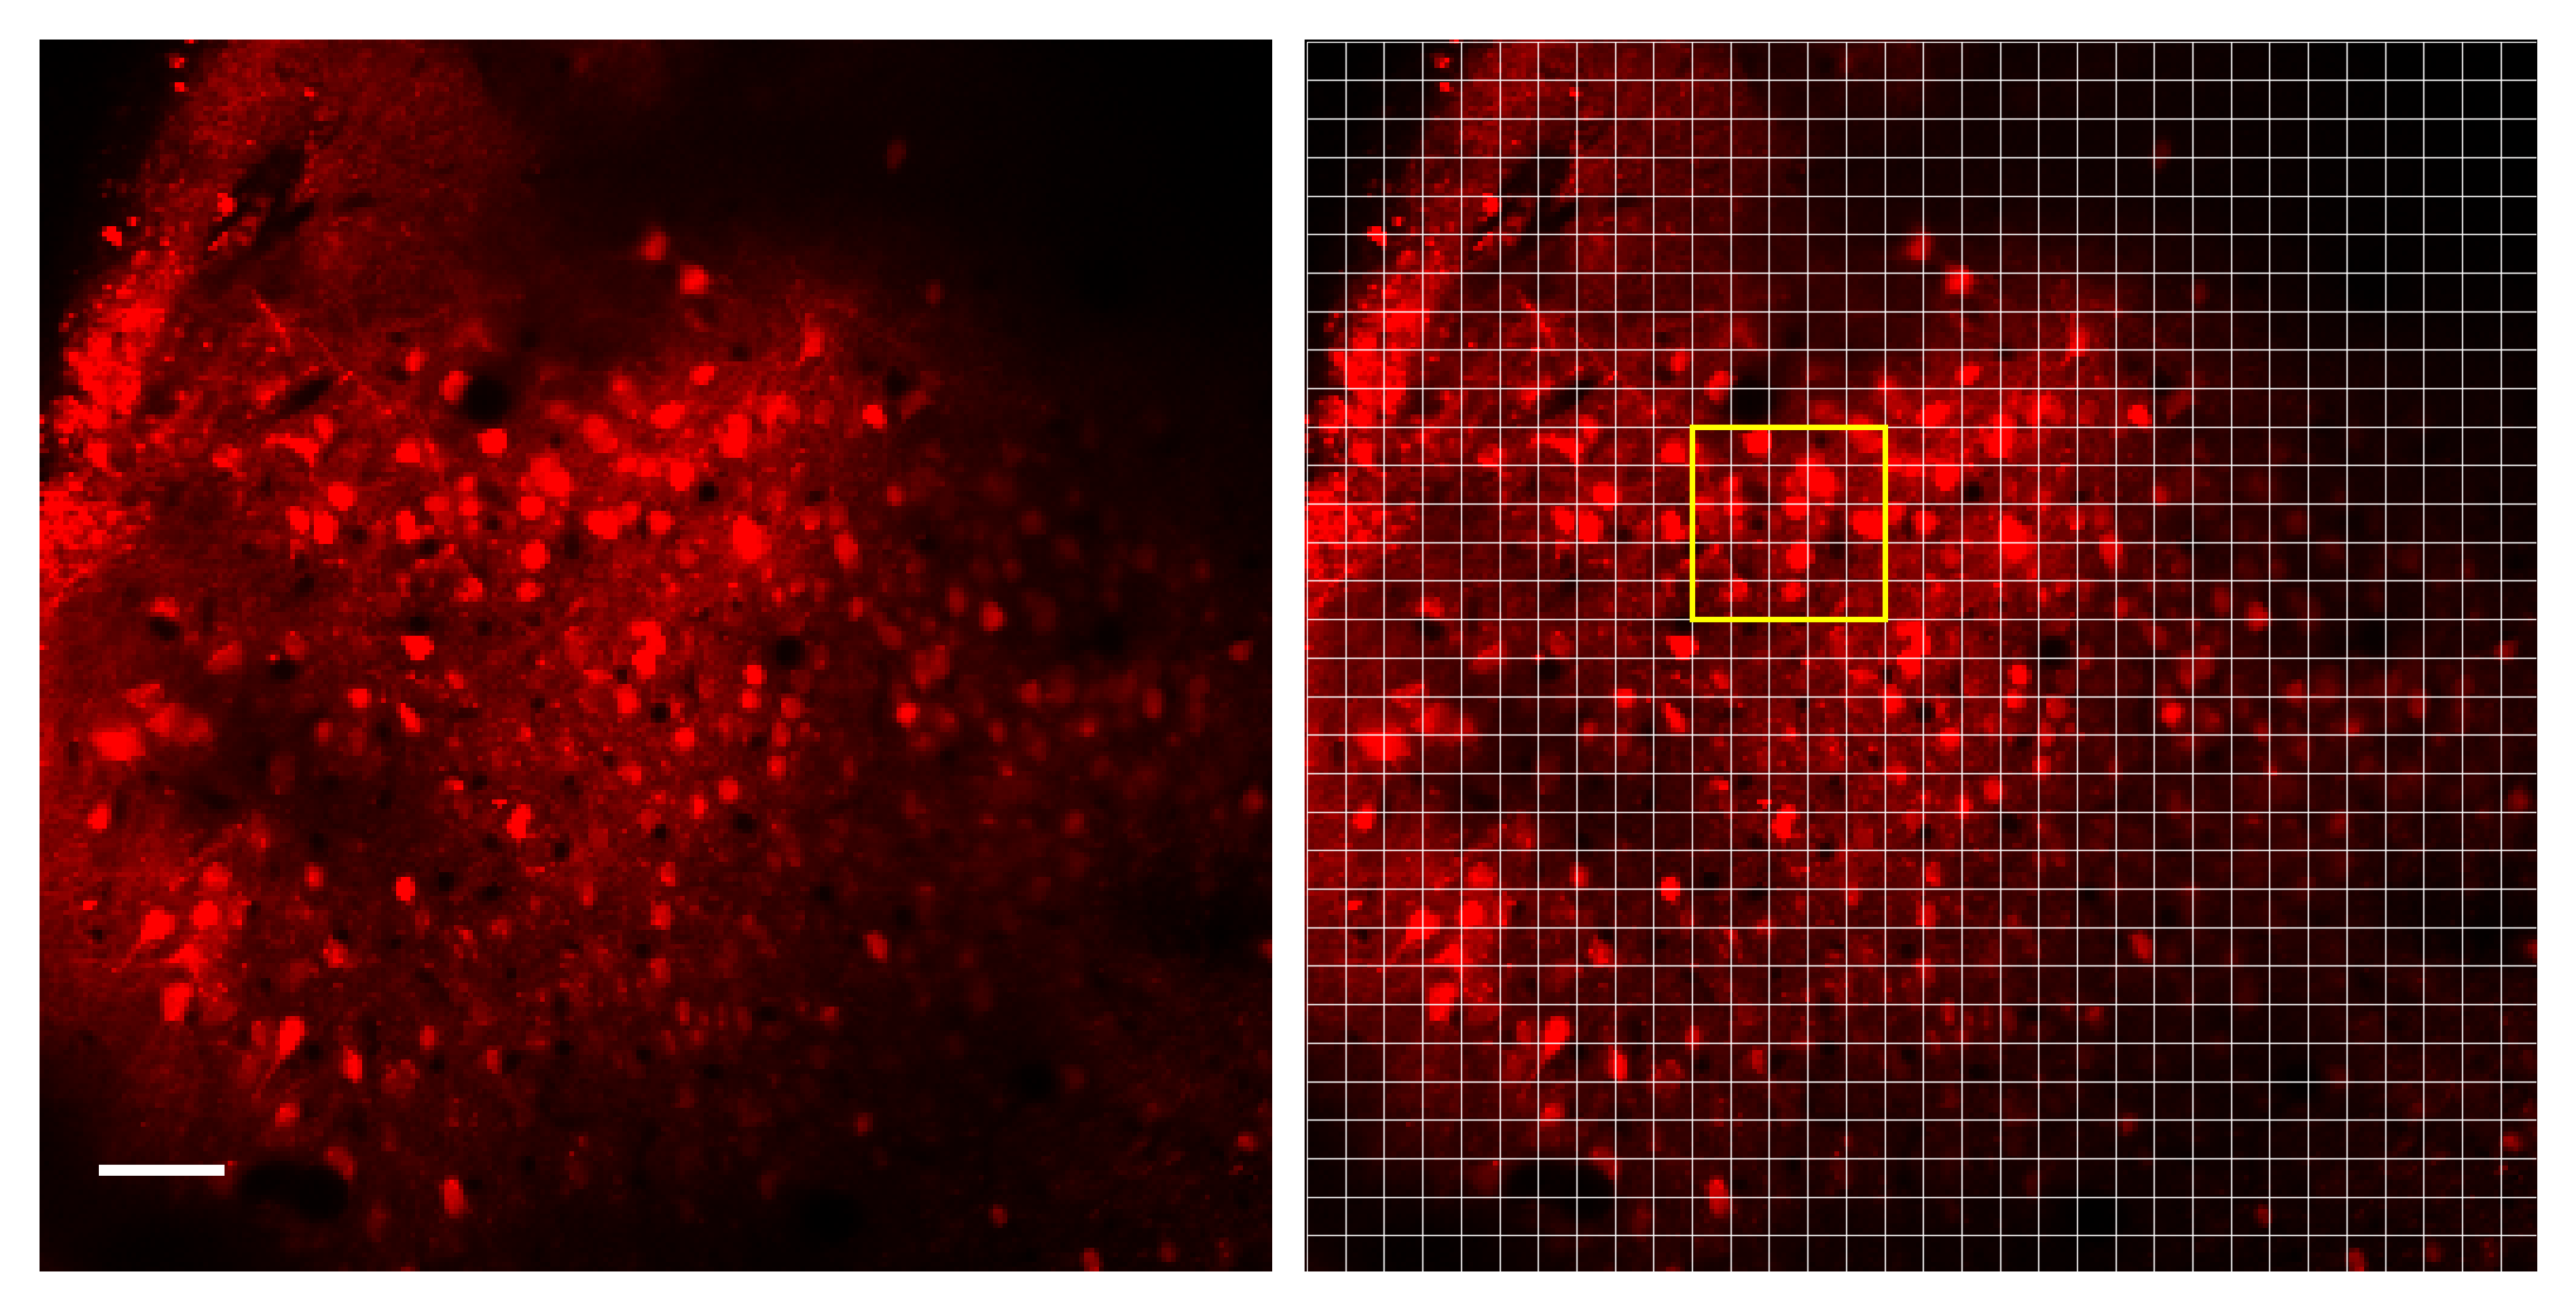

In [7]:
grid_exmaple('neurons')

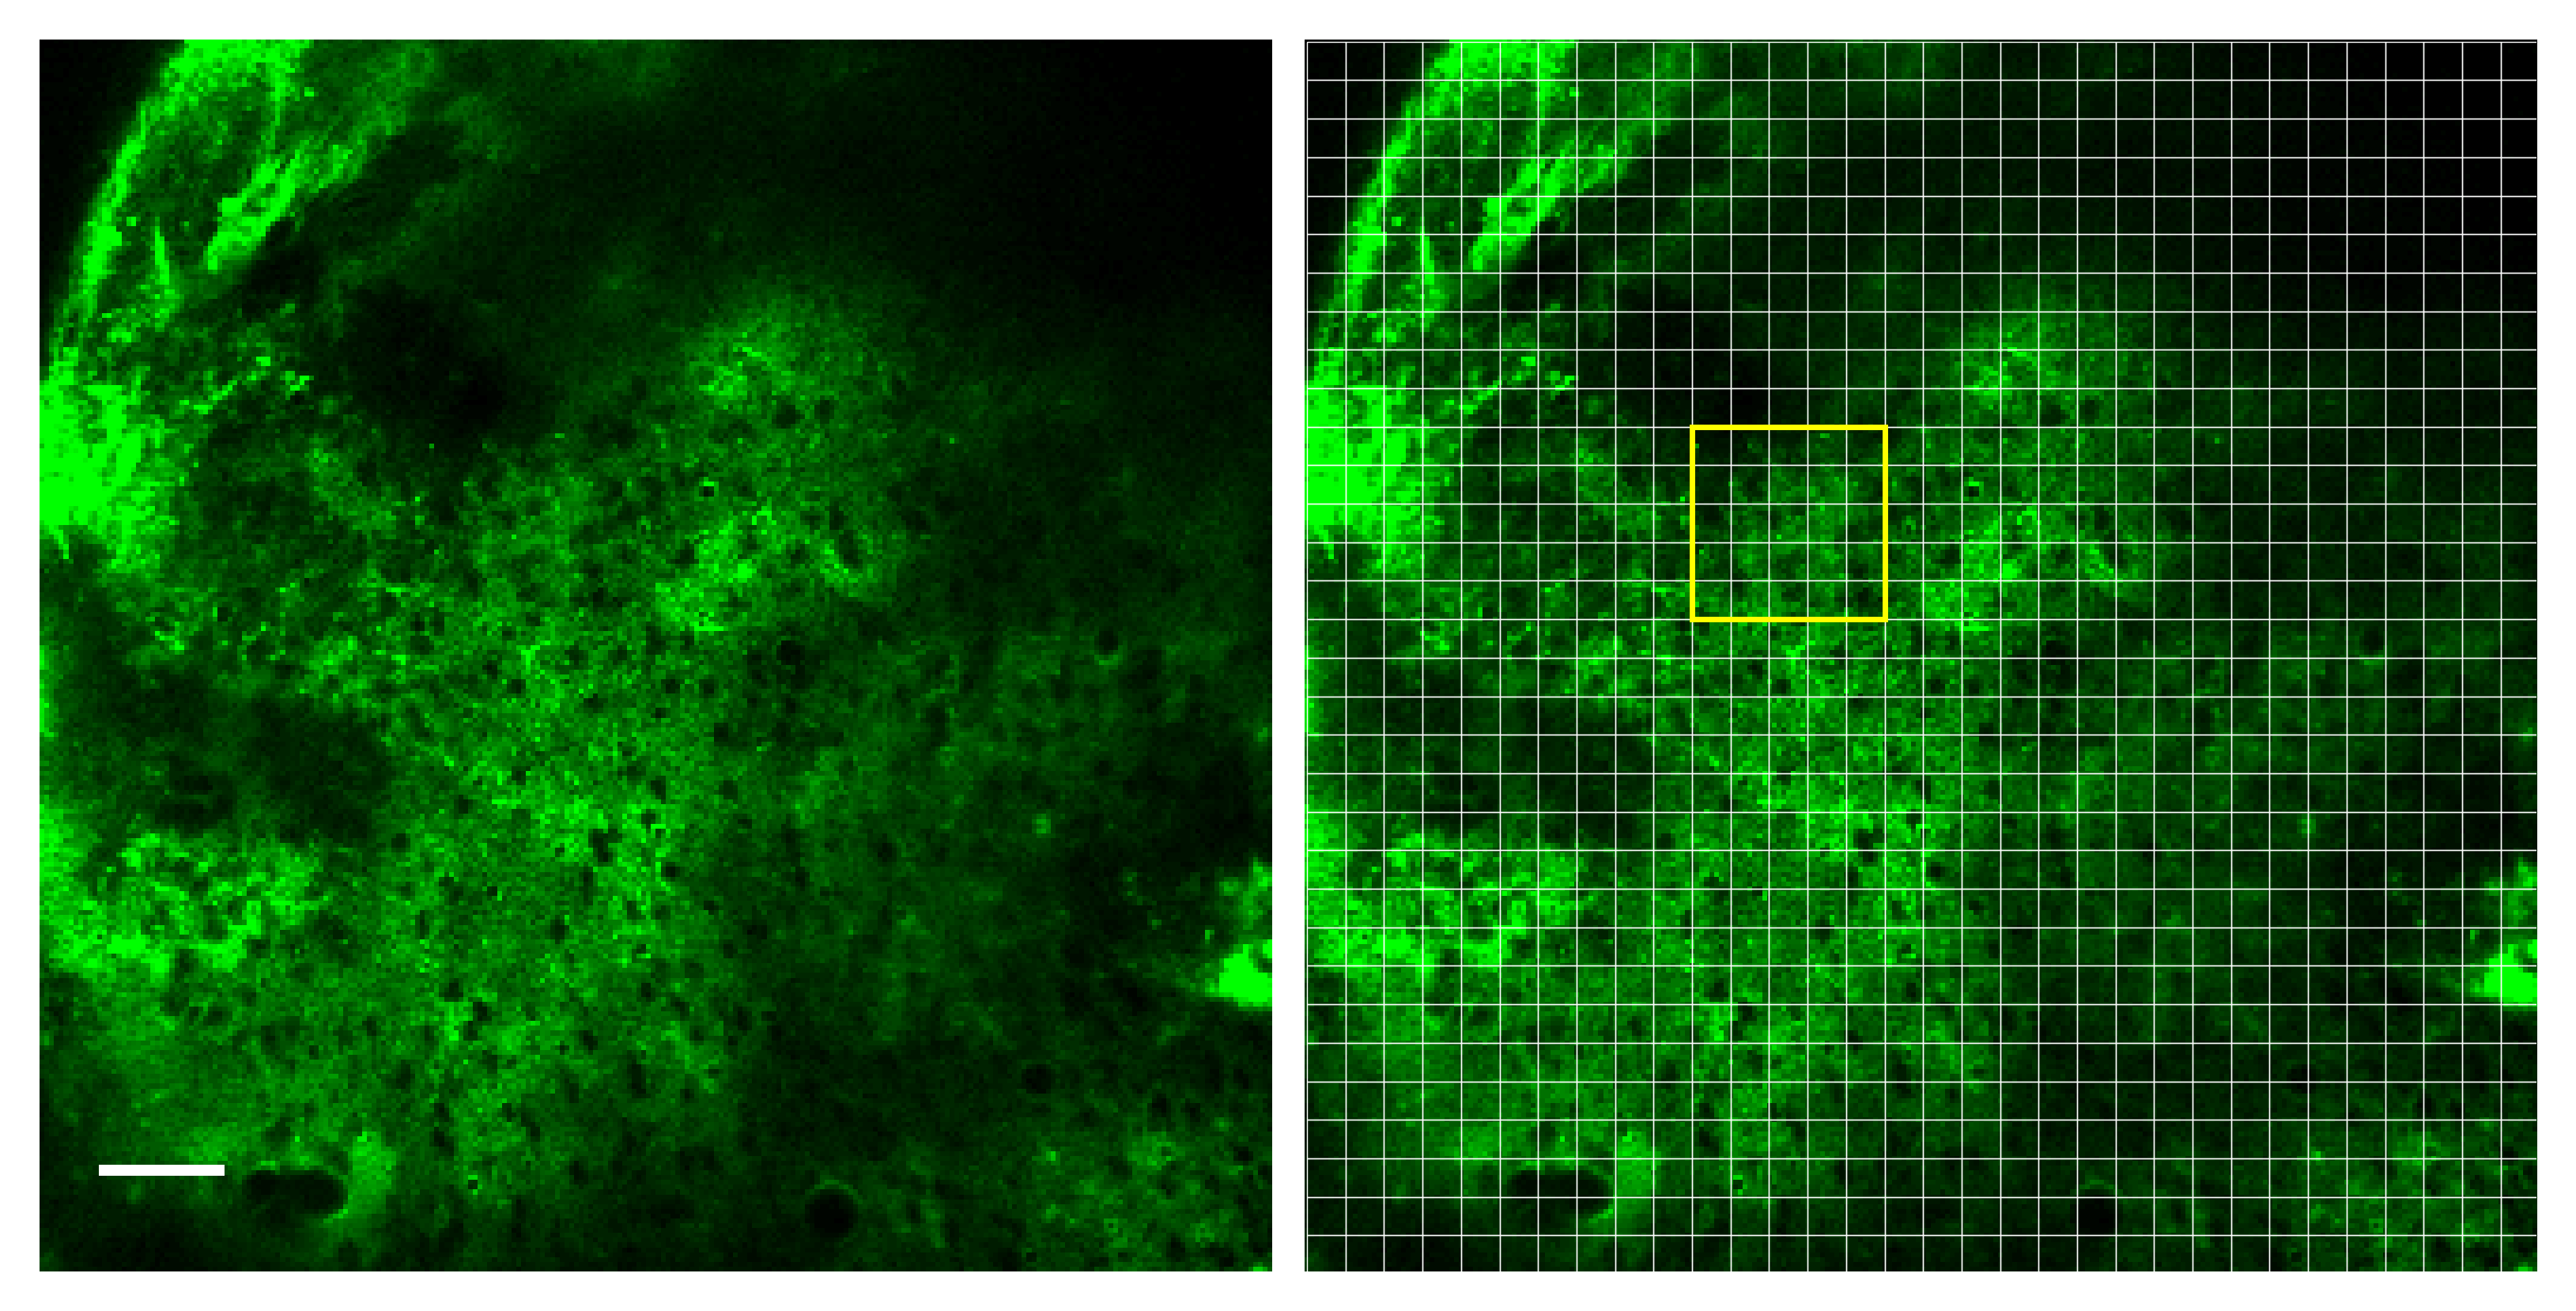

In [8]:
grid_exmaple('astrocytes')

In [10]:

grid_size = consts.DEFAULT_GRID_SIZE # This files fits into default grid size
rects = 5
def zoom_on_grid(cell_type:str):
    fig, ax = plt.subplots(1, 1, dpi = 700)
    image = image_processing.get_image(info[cell_type], cell_type)
    zoom = image[10*grid_size:(10+rects)*grid_size, 10*grid_size:(10+rects)*grid_size, :]
    ax.imshow(zoom)
    for i in range(rects):
        for j in range(rects):
            rect = ptch.Rectangle((j*grid_size-0.5, i*grid_size-0.5), grid_size, grid_size, edgecolor = 'white', facecolor = 'none', linewidth = 0.5)
            ax.add_patch(rect)

    for spine in ax.spines.values():
        spine.set_color('yellow')    # Change color to yellow
        spine.set_linewidth(7)
    # ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    # plotting.save_fig(fig, 2, f"Zoom on {rects}x{rects} {cell_type}")

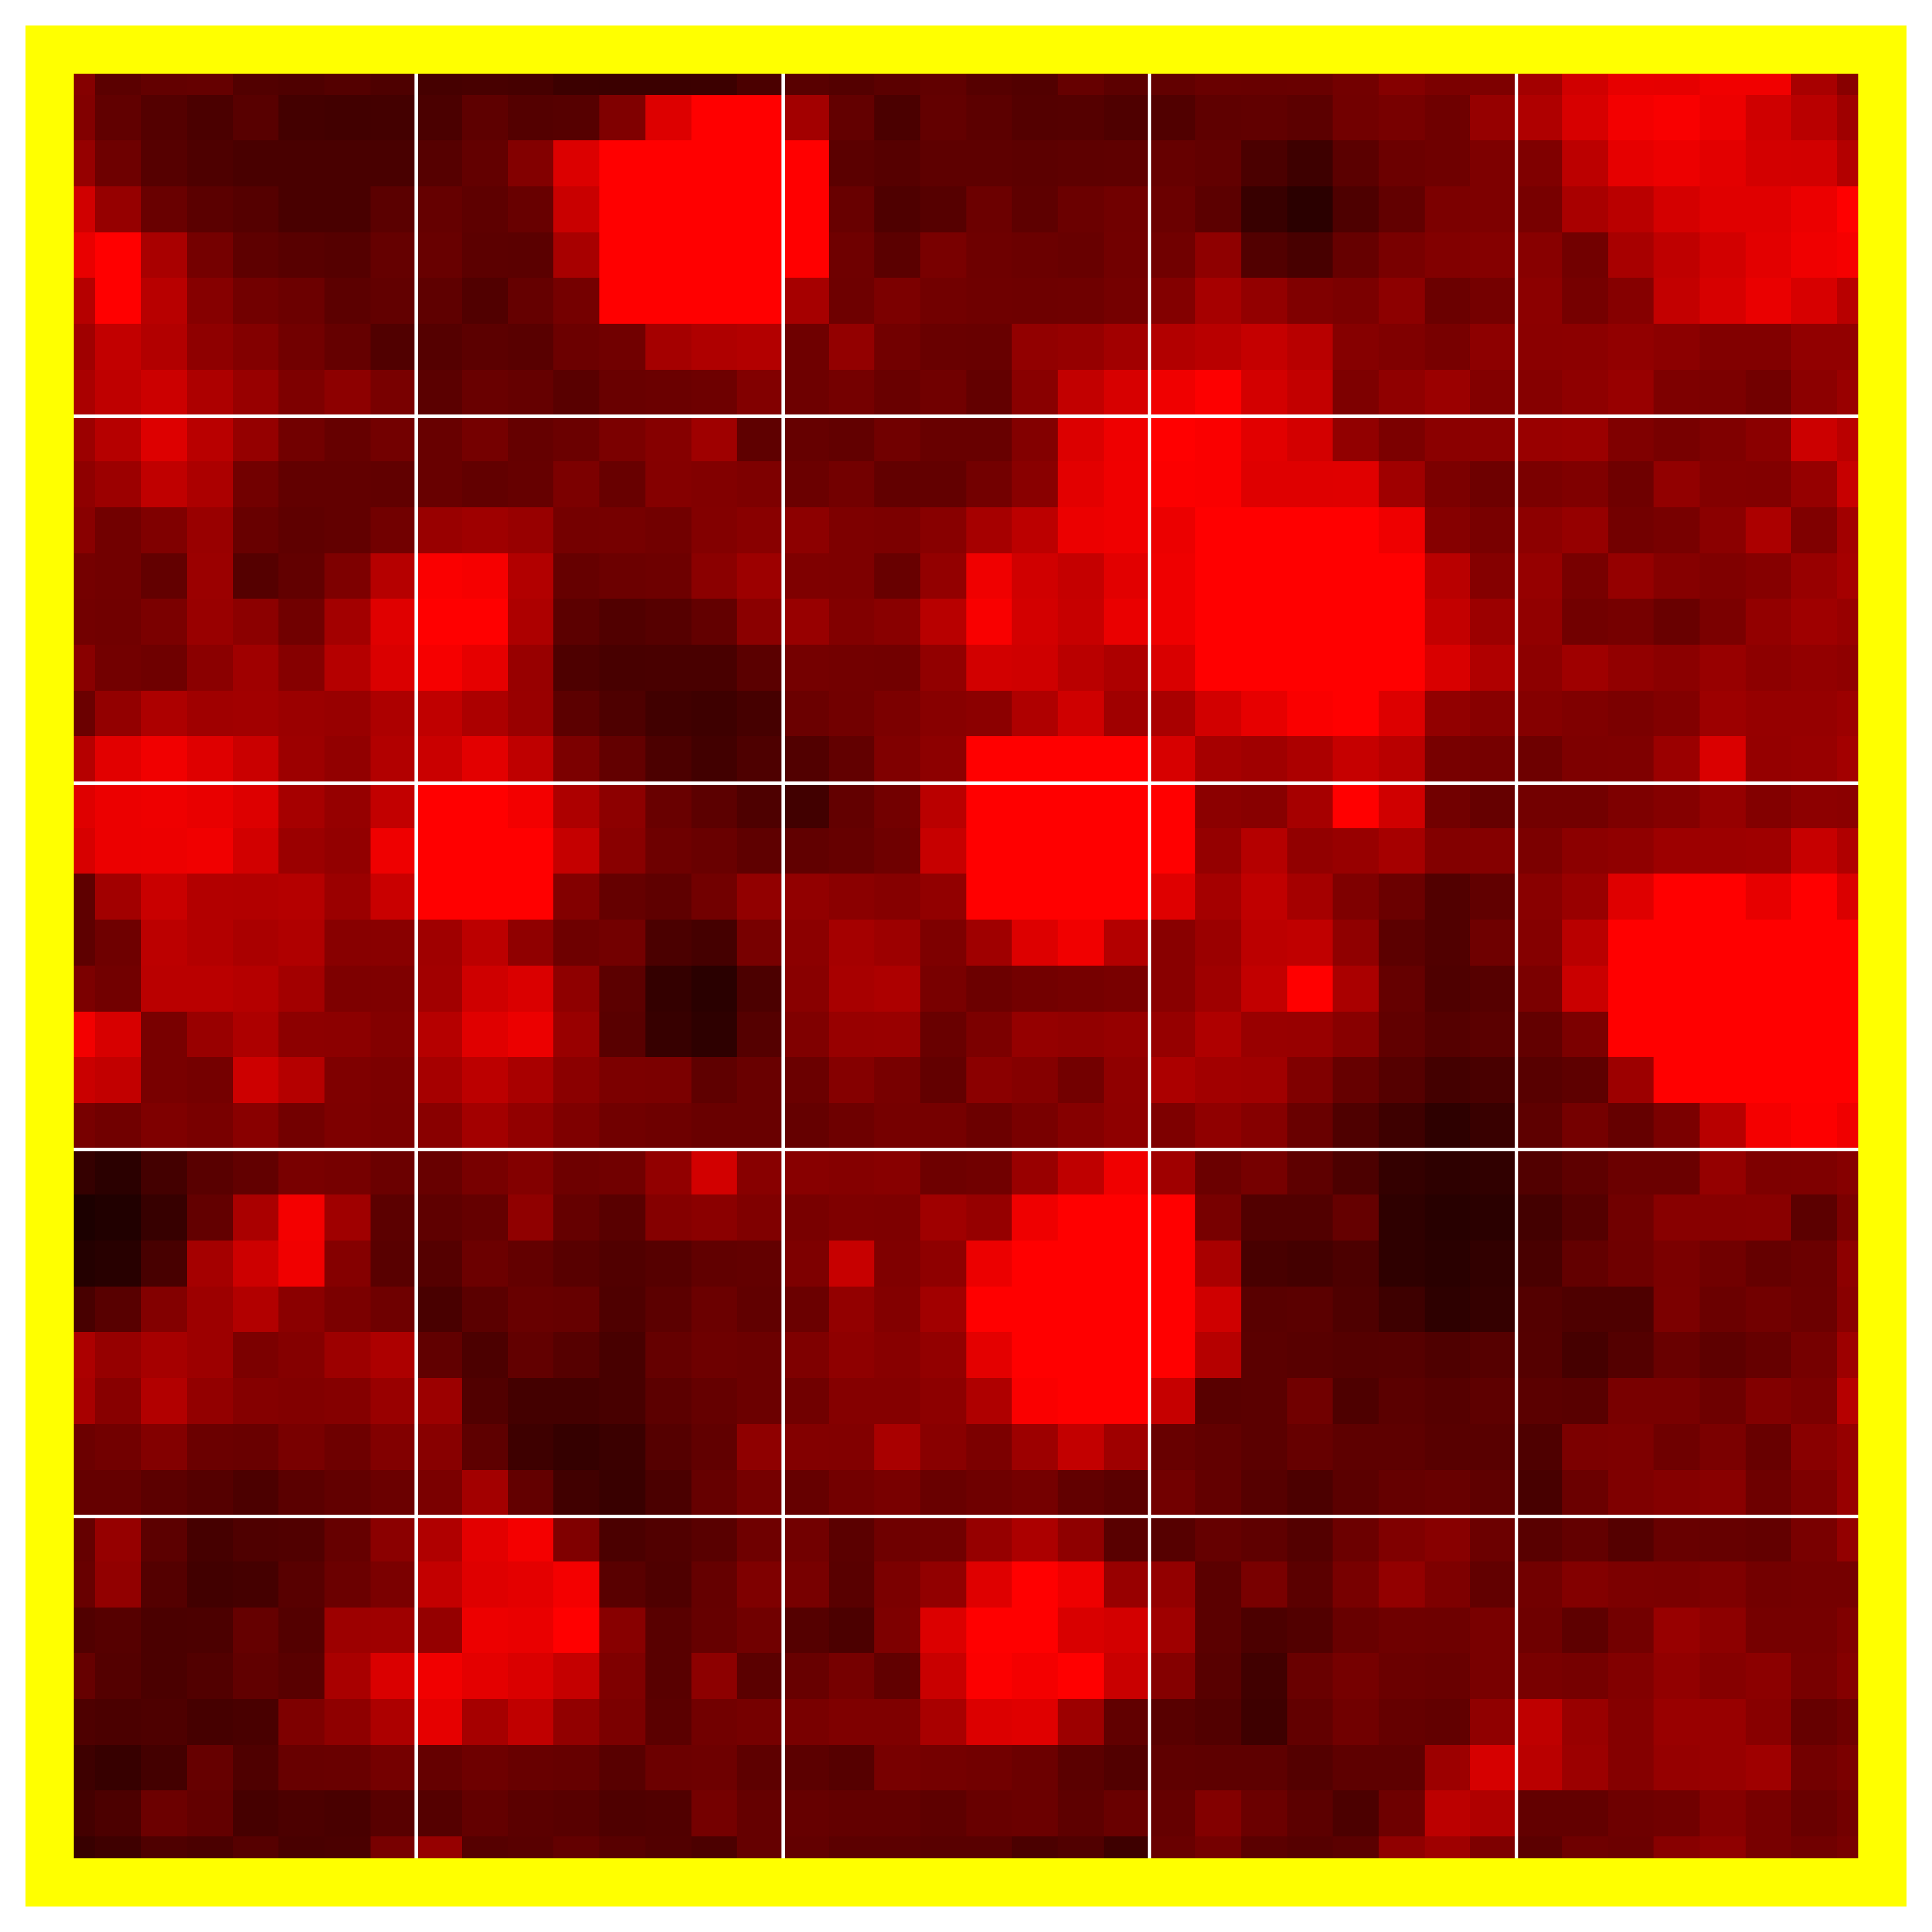

In [11]:
zoom_on_grid('neurons')

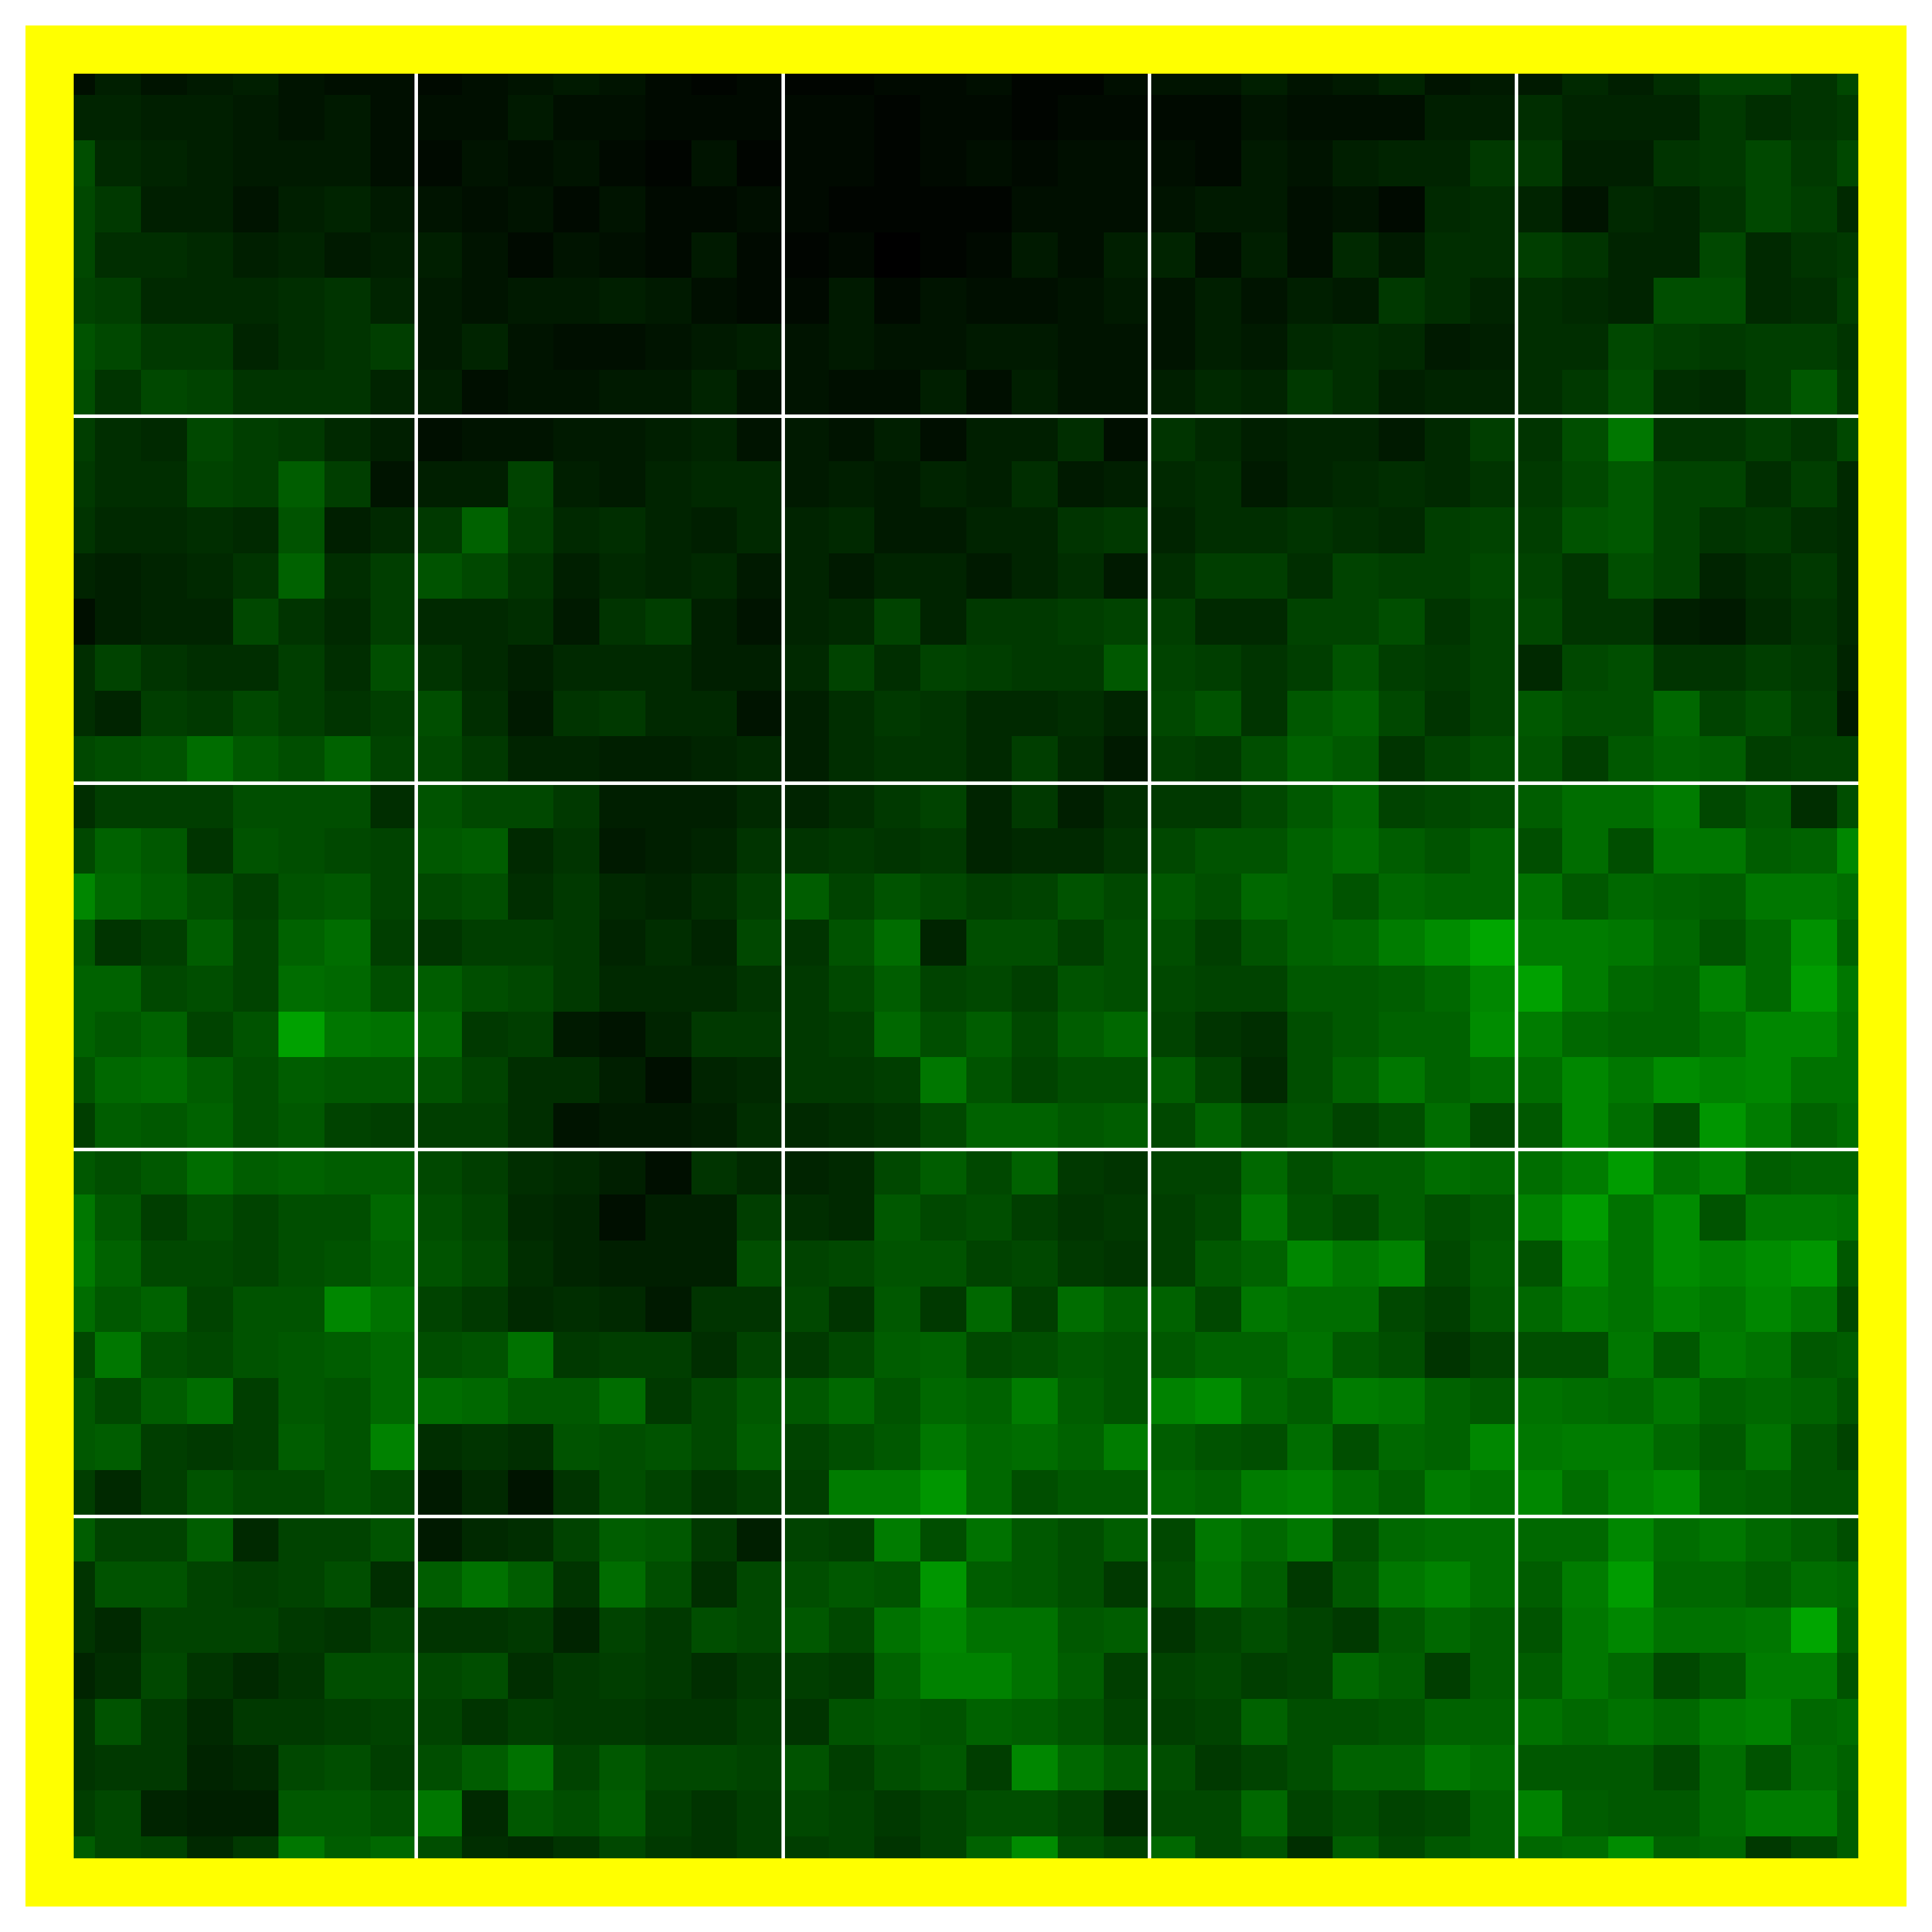

In [33]:
zoom_on_grid('astrocytes')

## B

Text(0, 0.5, 'Astrocytes')

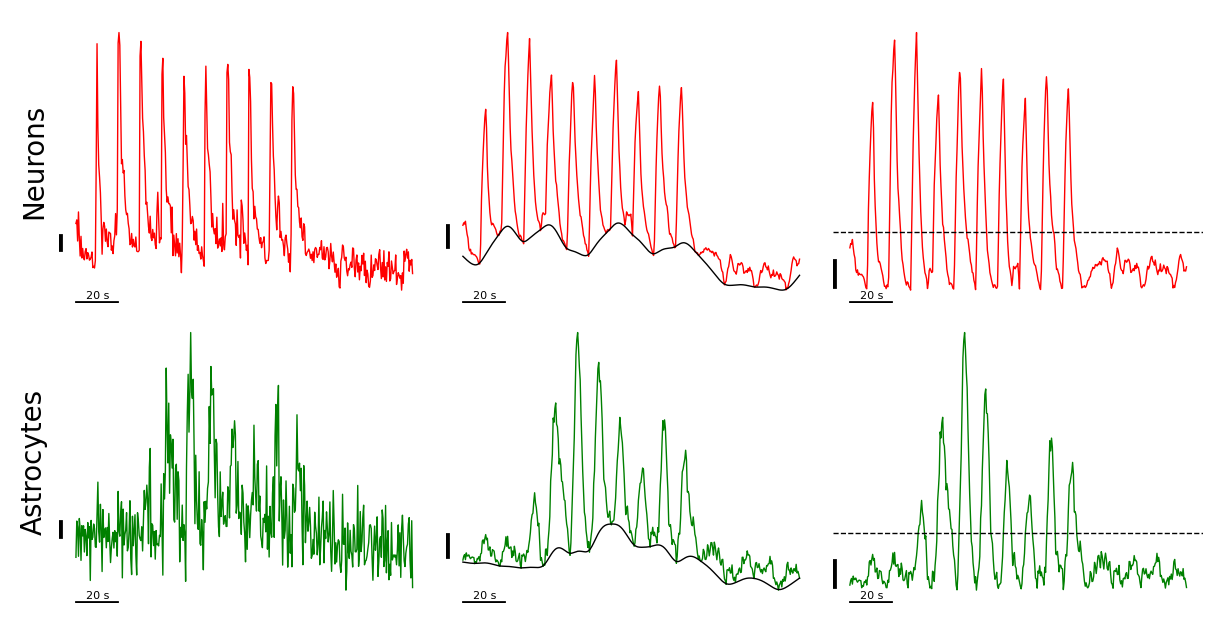

In [27]:
neurons_rois = input_output.image_to_roi_signals(info['neurons'])
astrocytes_rois = input_output.image_to_roi_signals(info['astrocytes'])
ss1 = info['stimulations_starts'][0]

row, column = 16, 1

n_signal = neurons_rois[:, row, column]
n_signal = (n_signal - np.average(n_signal[:ss1]))/np.std(n_signal[:ss1])
n_mva = filters.moving_average(n_signal, 7)
n_baseline = filters.baseline_als(n_mva, 30, 0.001)
a_signal = astrocytes_rois[:, row, column]
a_signal = (a_signal - np.average(a_signal[:ss1]))/np.std(a_signal[:ss1])
a_mva = filters.moving_average(a_signal, 7)
a_baseline = filters.baseline_als(a_mva, 30, 0.001)

fig, ax = plt.subplots(2, 3, dpi = 200, layout = "compressed", figsize = (6, 3))
linewidth = 0.5
neurons_color = 'red'
baseline_color = 'black'
astrocytes_color = 'green'
x = np.arange(neurons_rois.shape[0])/info['fs']
ax[0, 0].plot(x, n_signal, linewidth = linewidth, color = neurons_color)
ax[0, 1].plot(x, n_mva[3:-3], linewidth = linewidth, color = neurons_color)
ax[0, 1].plot(x, n_baseline[3:-3], linewidth = linewidth, color = baseline_color)
ax[0, 2].plot(x, (n_mva - n_baseline)[3:-3], linewidth = linewidth, color = neurons_color)
ax[0, 2].axhline(2, color = baseline_color, linestyle = '--', linewidth = linewidth)
ax[1, 0].plot(x, a_signal, linewidth = linewidth, color = astrocytes_color)
ax[1, 1].plot(x, a_mva[3:-3], linewidth = linewidth, color = astrocytes_color)
ax[1, 1].plot(x, a_baseline[3:-3], linewidth = linewidth, color = baseline_color)
ax[1, 2].plot(x, (a_mva - a_baseline)[3:-3], linewidth = linewidth, color = astrocytes_color)
ax[1, 2].axhline(2, color = baseline_color, linestyle = '--', linewidth = linewidth)

for a in ax.flatten():
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.set_yticks([])
    a.set_xticks([])

    transform = mtl.transforms.blended_transform_factory(a.transData, a.transAxes)
    rect = ptch.Rectangle((0, 0), width=20, height=0.005, color="black", transform=transform)
    a.add_patch(rect)
    a.text(5, 0.015, "20 s", fontsize = 4, transform = transform)
    transform = mtl.transforms.blended_transform_factory(a.transAxes, a.transData)
    rect = ptch.Rectangle((0, 0), width=0.005, height=1, color="black", transform=transform)
    a.add_patch(rect)
    

ax[0, 0].set_ylabel("Neurons")
ax[1, 0].set_ylabel("Astrocytes")

## C
Plots C and E are displayed differently in the code. The saved vector images were then reorganised, but they are the same plots. Just in different order. C displayes everything for high stimulation intensity and E for low stimulation intensity.

In [28]:
def roi_activity(info, name, vmax):
    neurons_image = image_processing.get_image(info['neurons'], 'neurons')
    astrocytes_image = image_processing.get_image(info['astrocytes'], 'astrocytes')
    neurons_activity = signal_processing.find_activity(info['precomputed']['precomputed_neurons'][0],
                                                info['stimulations_starts'],
                                                fs = info['fs'],
                                                window_length=consts.NEURONS_WINDOW_LENGTH,
                                                time_above_threshold=consts.NEURONS_TIME_ABOVE_THRESHOLD,
                                                window_shift=consts.NEURONS_DELAY)
    neurons_peaks =  signal_processing.find_peaks(info['precomputed']['precomputed_neurons'][1],
                                                info['stimulations_starts'],
                                                fs = info['fs'],
                                                window_length=consts.NEURONS_WINDOW_LENGTH,
                                                window_shift=consts.NEURONS_DELAY)
    neurons_peaks[neurons_activity == 0] = np.nan
    neurons_peaks = np.nanmean(neurons_peaks, axis = 0)
    neurons_activity = np.sum(neurons_activity, axis = 0)

    astrocytes_activity = signal_processing.find_activity(info['precomputed']['precomputed_astrocytes'][0],
                                                info['stimulations_starts'],
                                                fs = info['fs'],
                                                window_length=consts.ASTROCYTES_WINDOW_LENGTH,
                                                time_above_threshold=consts.ASTROCYTES_TIME_ABOVE_THRESHOLD,
                                                window_shift=consts.ASTROCYTES_DELAY)
    astrocytes_peaks = signal_processing.find_peaks(info['precomputed']['precomputed_astrocytes'][1],
                                                info['stimulations_starts'],
                                                fs = info['fs'],
                                                window_length=4,
                                                window_shift=3)

    astrocytes_peaks[astrocytes_activity == 0] = np.nan
    astrocytes_peaks = np.nanmean(astrocytes_peaks, axis = 0)
    astrocytes_activity = np.sum(astrocytes_activity, axis = 0)

    fig, ax = plt.subplots(2, 3, dpi = 500, layout = "compressed")
    extent = 0, 256, 256, 0
    cmap = 'jet'
    labelsize = 6
    ax[0, 0].imshow(neurons_image)
    add_scale(ax[0, 0], info['x'])
    ax[0, 0].set_title("Average over time", fontsize = 6)
    im = ax[0, 1].imshow(neurons_activity, cmap = cmap, vmin = 0, vmax  = 10)
    cbar = fig.colorbar(im, location = 'left')
    cbar.ax.tick_params(labelsize = labelsize)
    ax[0, 1].set_title("Number of responsive ROIs", fontsize = 6)
    # ax[0, 2].imshow(neurons_image)
    # ax[0, 2].imshow(neurons_activity, alpha = 0.3, cmap = 'gray', vmin = 0, vmax =10, extent = extent, interpolation = 'nearest')
    # ax[0, 2].set_title("Overlap of image\nand responsive ROIs", fontsize = 6)
    im = ax[0, 2].imshow(neurons_peaks, cmap = cmap, vmin = 0, vmax = vmax)
    cbar = fig.colorbar(im)
    cbar.ax.tick_params(labelsize = labelsize)
    ax[0, 2].set_title("Average responsive peak intensity", fontsize = 6)

    ax[1, 0].imshow(astrocytes_image)
    add_scale(ax[1, 0], info['x'])
    im = ax[1, 1].imshow(astrocytes_activity, cmap = cmap, vmin = 0, vmax = 10)
    cbar = fig.colorbar(im, location = 'left')
    cbar.ax.tick_params(labelsize = labelsize)
    # ax[1, 2].imshow(astrocytes_image)
    # ax[1, 2].imshow(astrocytes_activity, alpha = 0.5, cmap = 'gray', vmin = 0, vmax =10, extent = extent, interpolation = 'nearest')
    im = ax[1, 2].imshow(astrocytes_peaks, cmap = cmap, vmin = 0, vmax = vmax)
    cbar = fig.colorbar(im)
    cbar.ax.tick_params(labelsize = labelsize)


    for a in ax.flatten():
        a.set_axis_off()

/tmp/ipykernel_94499/2341517787.py:16: RuntimeWarning: Mean of empty slice
  neurons_peaks = np.nanmean(neurons_peaks, axis = 0)
/tmp/ipykernel_94499/2341517787.py:32: RuntimeWarning: Mean of empty slice
  astrocytes_peaks = np.nanmean(astrocytes_peaks, axis = 0)


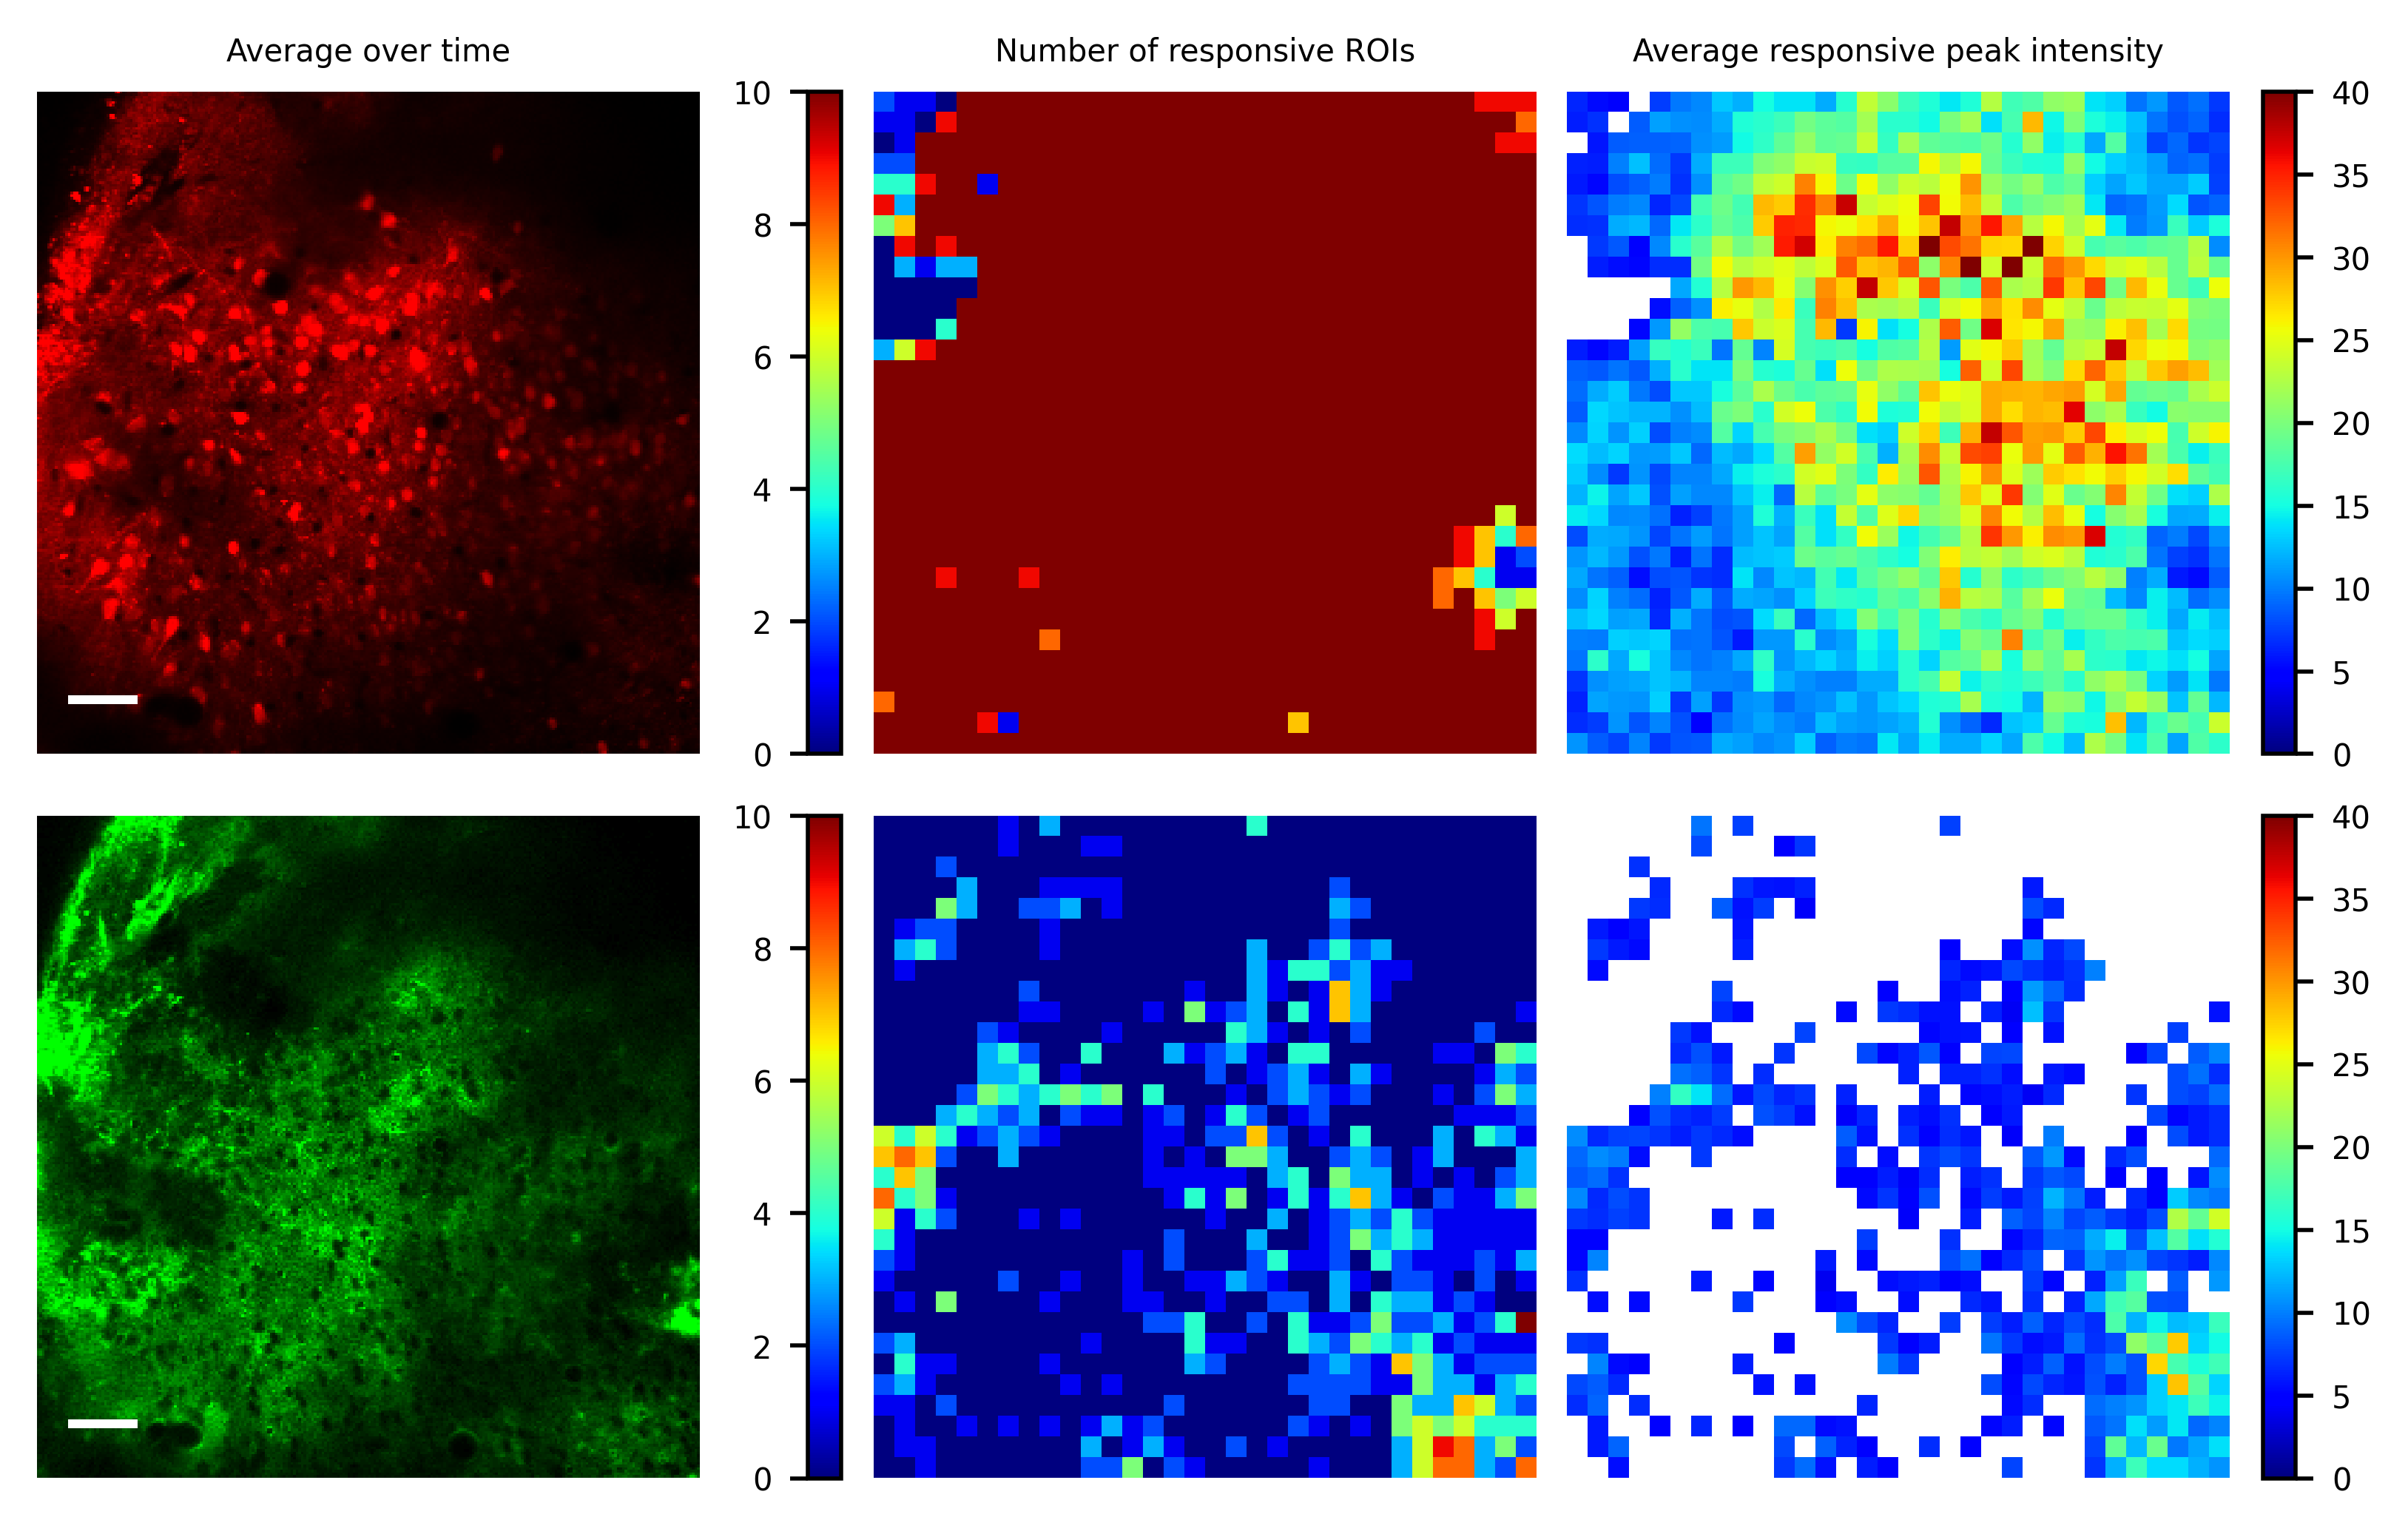

In [29]:
info = input_output.load(input_output.EXAMPLE_FILE)
roi_activity(info, name = "High intensity canva", vmax = 40)

## D

In [14]:
neurons_dict, astro_dict = empty_dicts()

for m_info in input_output.mouse_infos():

    neurons_activity, astrocytes_activity = signal_processing.get_activity(m_info)
    neurons_peaks, astrocytes_peaks = signal_processing.get_peaks(m_info)
    
    astrocytes_peaks[astrocytes_activity == 0] = np.nan
    astrocytes_peaks[astrocytes_peaks < 2] = np.nan
    neurons_peaks[neurons_activity == 0] = np.nan
    neurons_peaks[neurons_peaks < 2] = np.nan

    astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
    neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()

    neurons_dict[m_info['current']].extend(neurons_peaks_avg)
    astro_dict[m_info['current']].extend(astrocytes_peaks_avg)

/tmp/ipykernel_94499/156034458.py:13: RuntimeWarning: Mean of empty slice
  astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
/tmp/ipykernel_94499/156034458.py:14: RuntimeWarning: Mean of empty slice
  neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()


SignificanceResult(statistic=0.6221552461685671, pvalue=0.0)
PearsonRResult(statistic=0.5183761445721806, pvalue=0.0)
KruskalResult(statistic=9362.04750599341, pvalue=0.0)
0 8.571 ± 4.488
1 11.622 ± 7.028
2 15.685 ± 9.287
3 21.922 ± 11.518
4 27.374 ± 16.582
SignificanceResult(statistic=0.0959837139563182, pvalue=1.4695598552011954e-14)
PearsonRResult(statistic=0.11230693252204399, pvalue=2.1432591231814176e-19)
KruskalResult(statistic=75.42751162988861, pvalue=1.6180400389149078e-15)
0 7.253 ± 2.198
1 7.023 ± 1.823
2 7.064 ± 1.922
3 7.525 ± 2.226
4 7.760 ± 2.639


Text(3, 27.6, '★★')

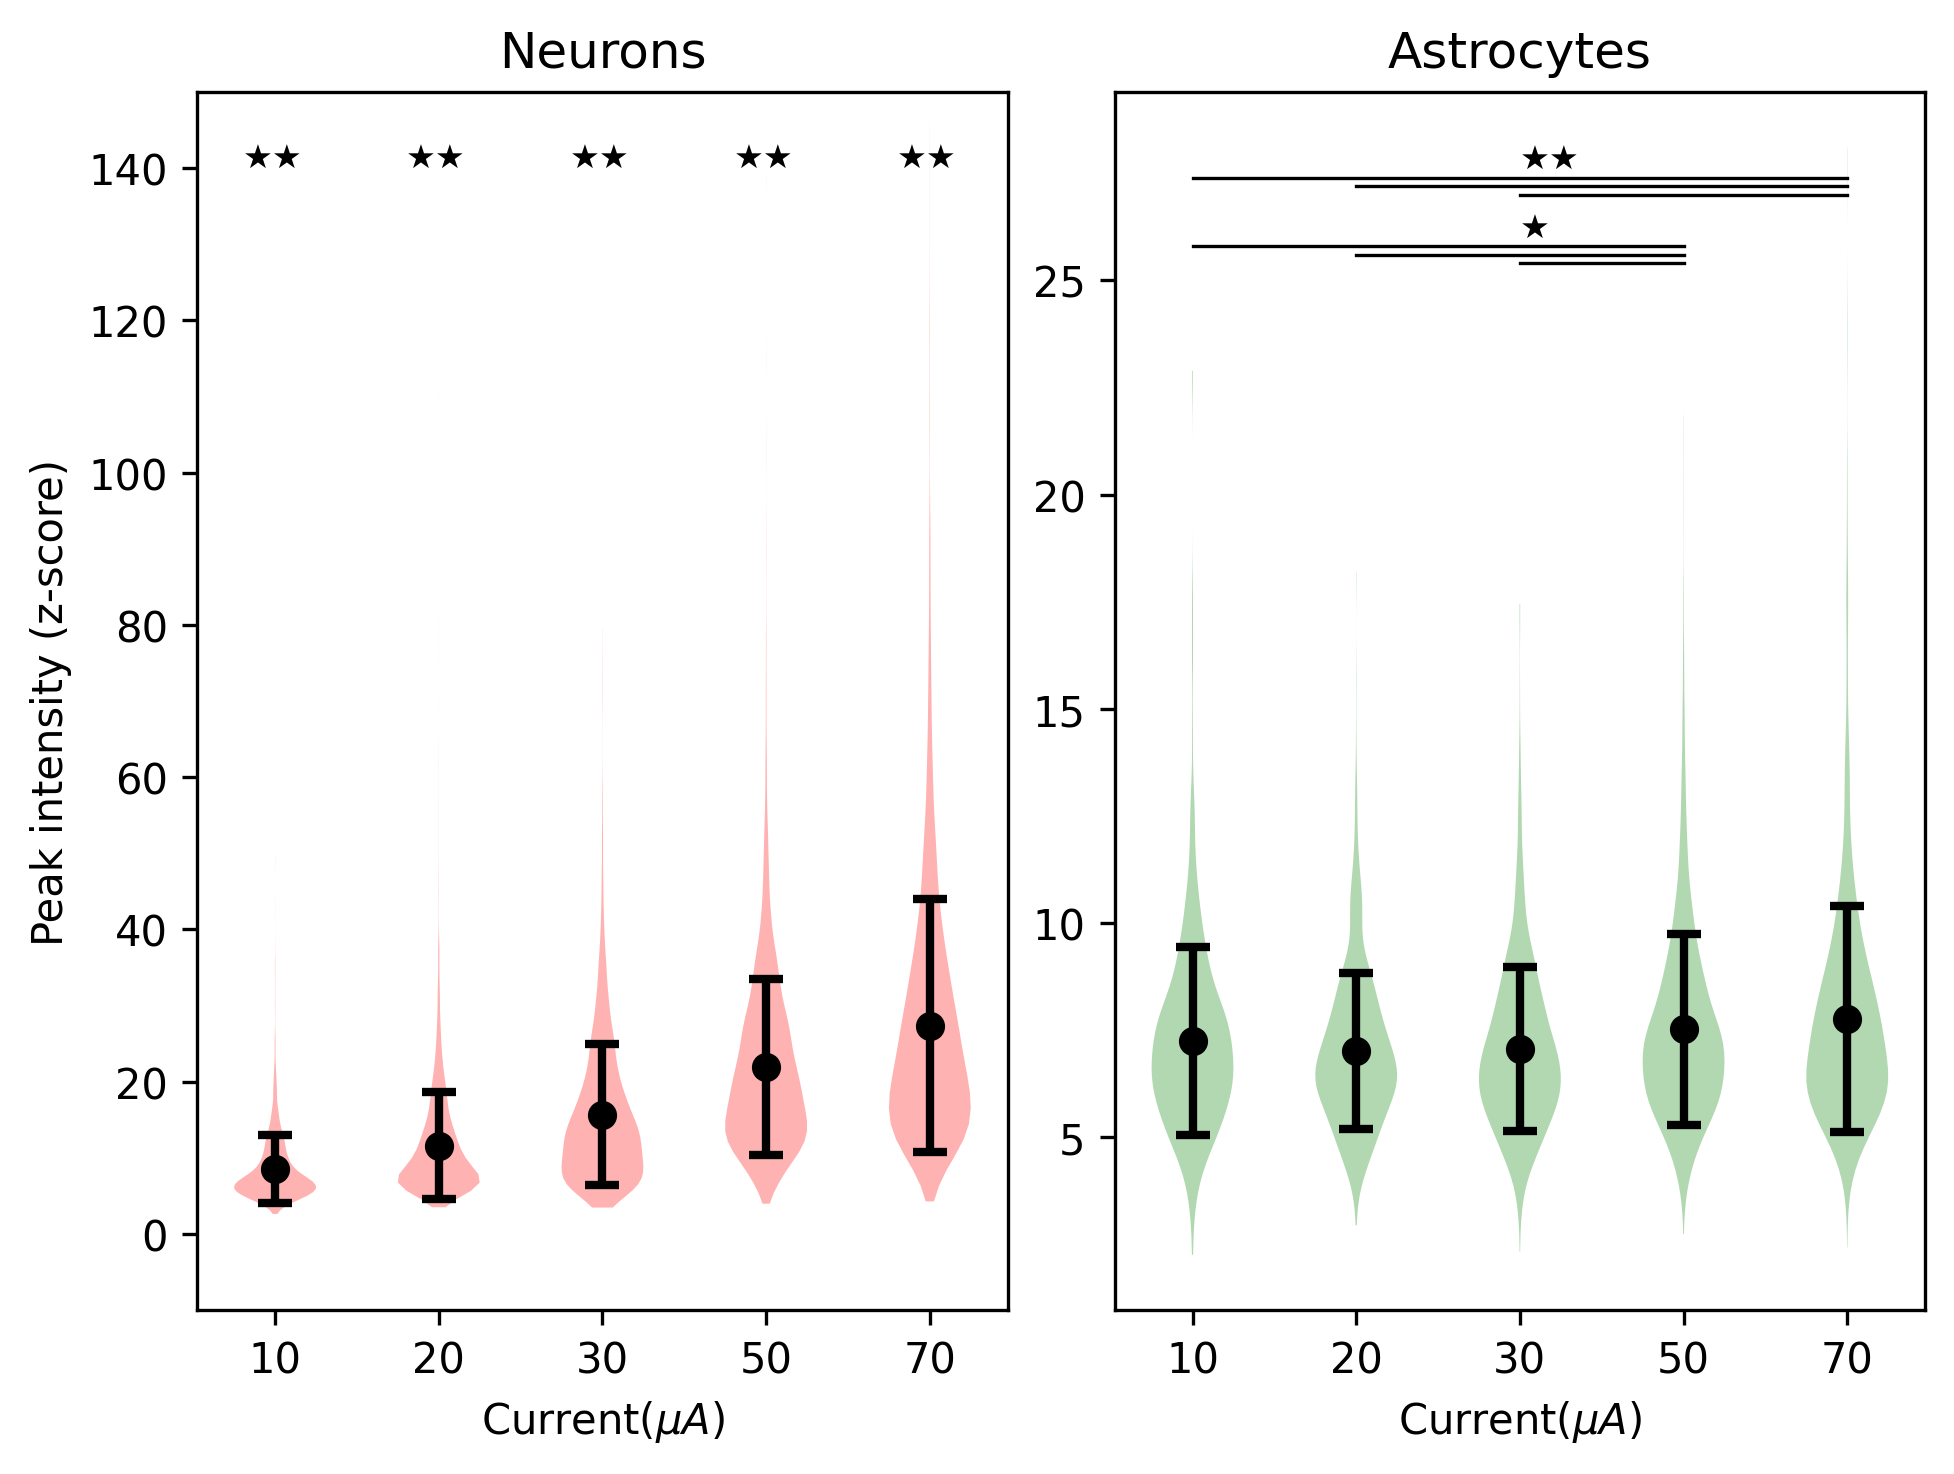

In [15]:
fig, ax = plt.subplots(1, 2, layout = 'compressed', dpi = 300)
for index, d in enumerate((neurons_dict, astro_dict)):
    dataset = [np.array(d[key]).flatten() for key in sorted(d.keys())]
    dataset = [l[~np.isnan(l)] for l in dataset]


    y = np.concatenate(dataset)
    x = np.concatenate([np.full_like(set, cur) for set, cur in zip(dataset, input_output.SHOWCASE_CURRENTS)])
    print(scipy.stats.spearmanr(x, y))
    print(scipy.stats.pearsonr(x, y))

    print(scipy.stats.kruskal(*dataset))
    violins = ax[index].violinplot(dataset, showextrema = False)

    color = 'green' if index else 'red'
    for body in violins['bodies']:
        body.set_facecolor(color)
        # violins['cbars'].set_color(color)
        # violins['cmins'].set_color(color)
        # violins['cmaxes'].set_color(color)
 
    for i, l in enumerate(dataset):
        avg = np.nanmean(l)
        std = np.nanstd(l)
        print(i, f'{avg:.3f} \u00B1 {std:.3f}')
        ax[index].errorbar(
            i + 1,
            avg,
            yerr = std,
            color = 'black',
            fmt = 'o',
            capsize = 4,
            capthick = 2,
            linewidth = 2
        )


    ax[index].set_xticks([1, 2, 3, 4, 5],labels = sorted(d.keys()))
    ax[index].set_xlabel(r'Current($\mu A$)')
ax[0].set_ylim(-10, 150)
ax[0].set_ylabel('Peak intensity (z-score)')
ax[0].set_title('Neurons')
ax[1].set_title('Astrocytes')
for i in range(1, 6):
    ax[0].text(i-0.2, 140, "★★", fontsize = 8)

transform = mtl.transforms.blended_transform_factory(ax[1].transData, ax[1].transData)
xs = [
    [1, 5], [2, 5], [3, 5],
    [1, 4], [2, 4], [3, 4]
]
ys = [27.4, 27.2, 27, 25.8, 25.6, 25.4]
for x, y in zip(xs, ys):
    ax[1].plot(x, (y, y), color = 'black', linewidth = 0.8)
    
ax[1].text(3, 26, "★", fontsize = 8, transform = transform,)
ax[1].text(3, 27.6, "★★", fontsize = 8, transform = transform)

# nasa.plotting.save_fig(fig, 3, 'Peak intensity - std')

## E

/tmp/ipykernel_94499/2341517787.py:16: RuntimeWarning: Mean of empty slice
  neurons_peaks = np.nanmean(neurons_peaks, axis = 0)
/tmp/ipykernel_94499/2341517787.py:32: RuntimeWarning: Mean of empty slice
  astrocytes_peaks = np.nanmean(astrocytes_peaks, axis = 0)


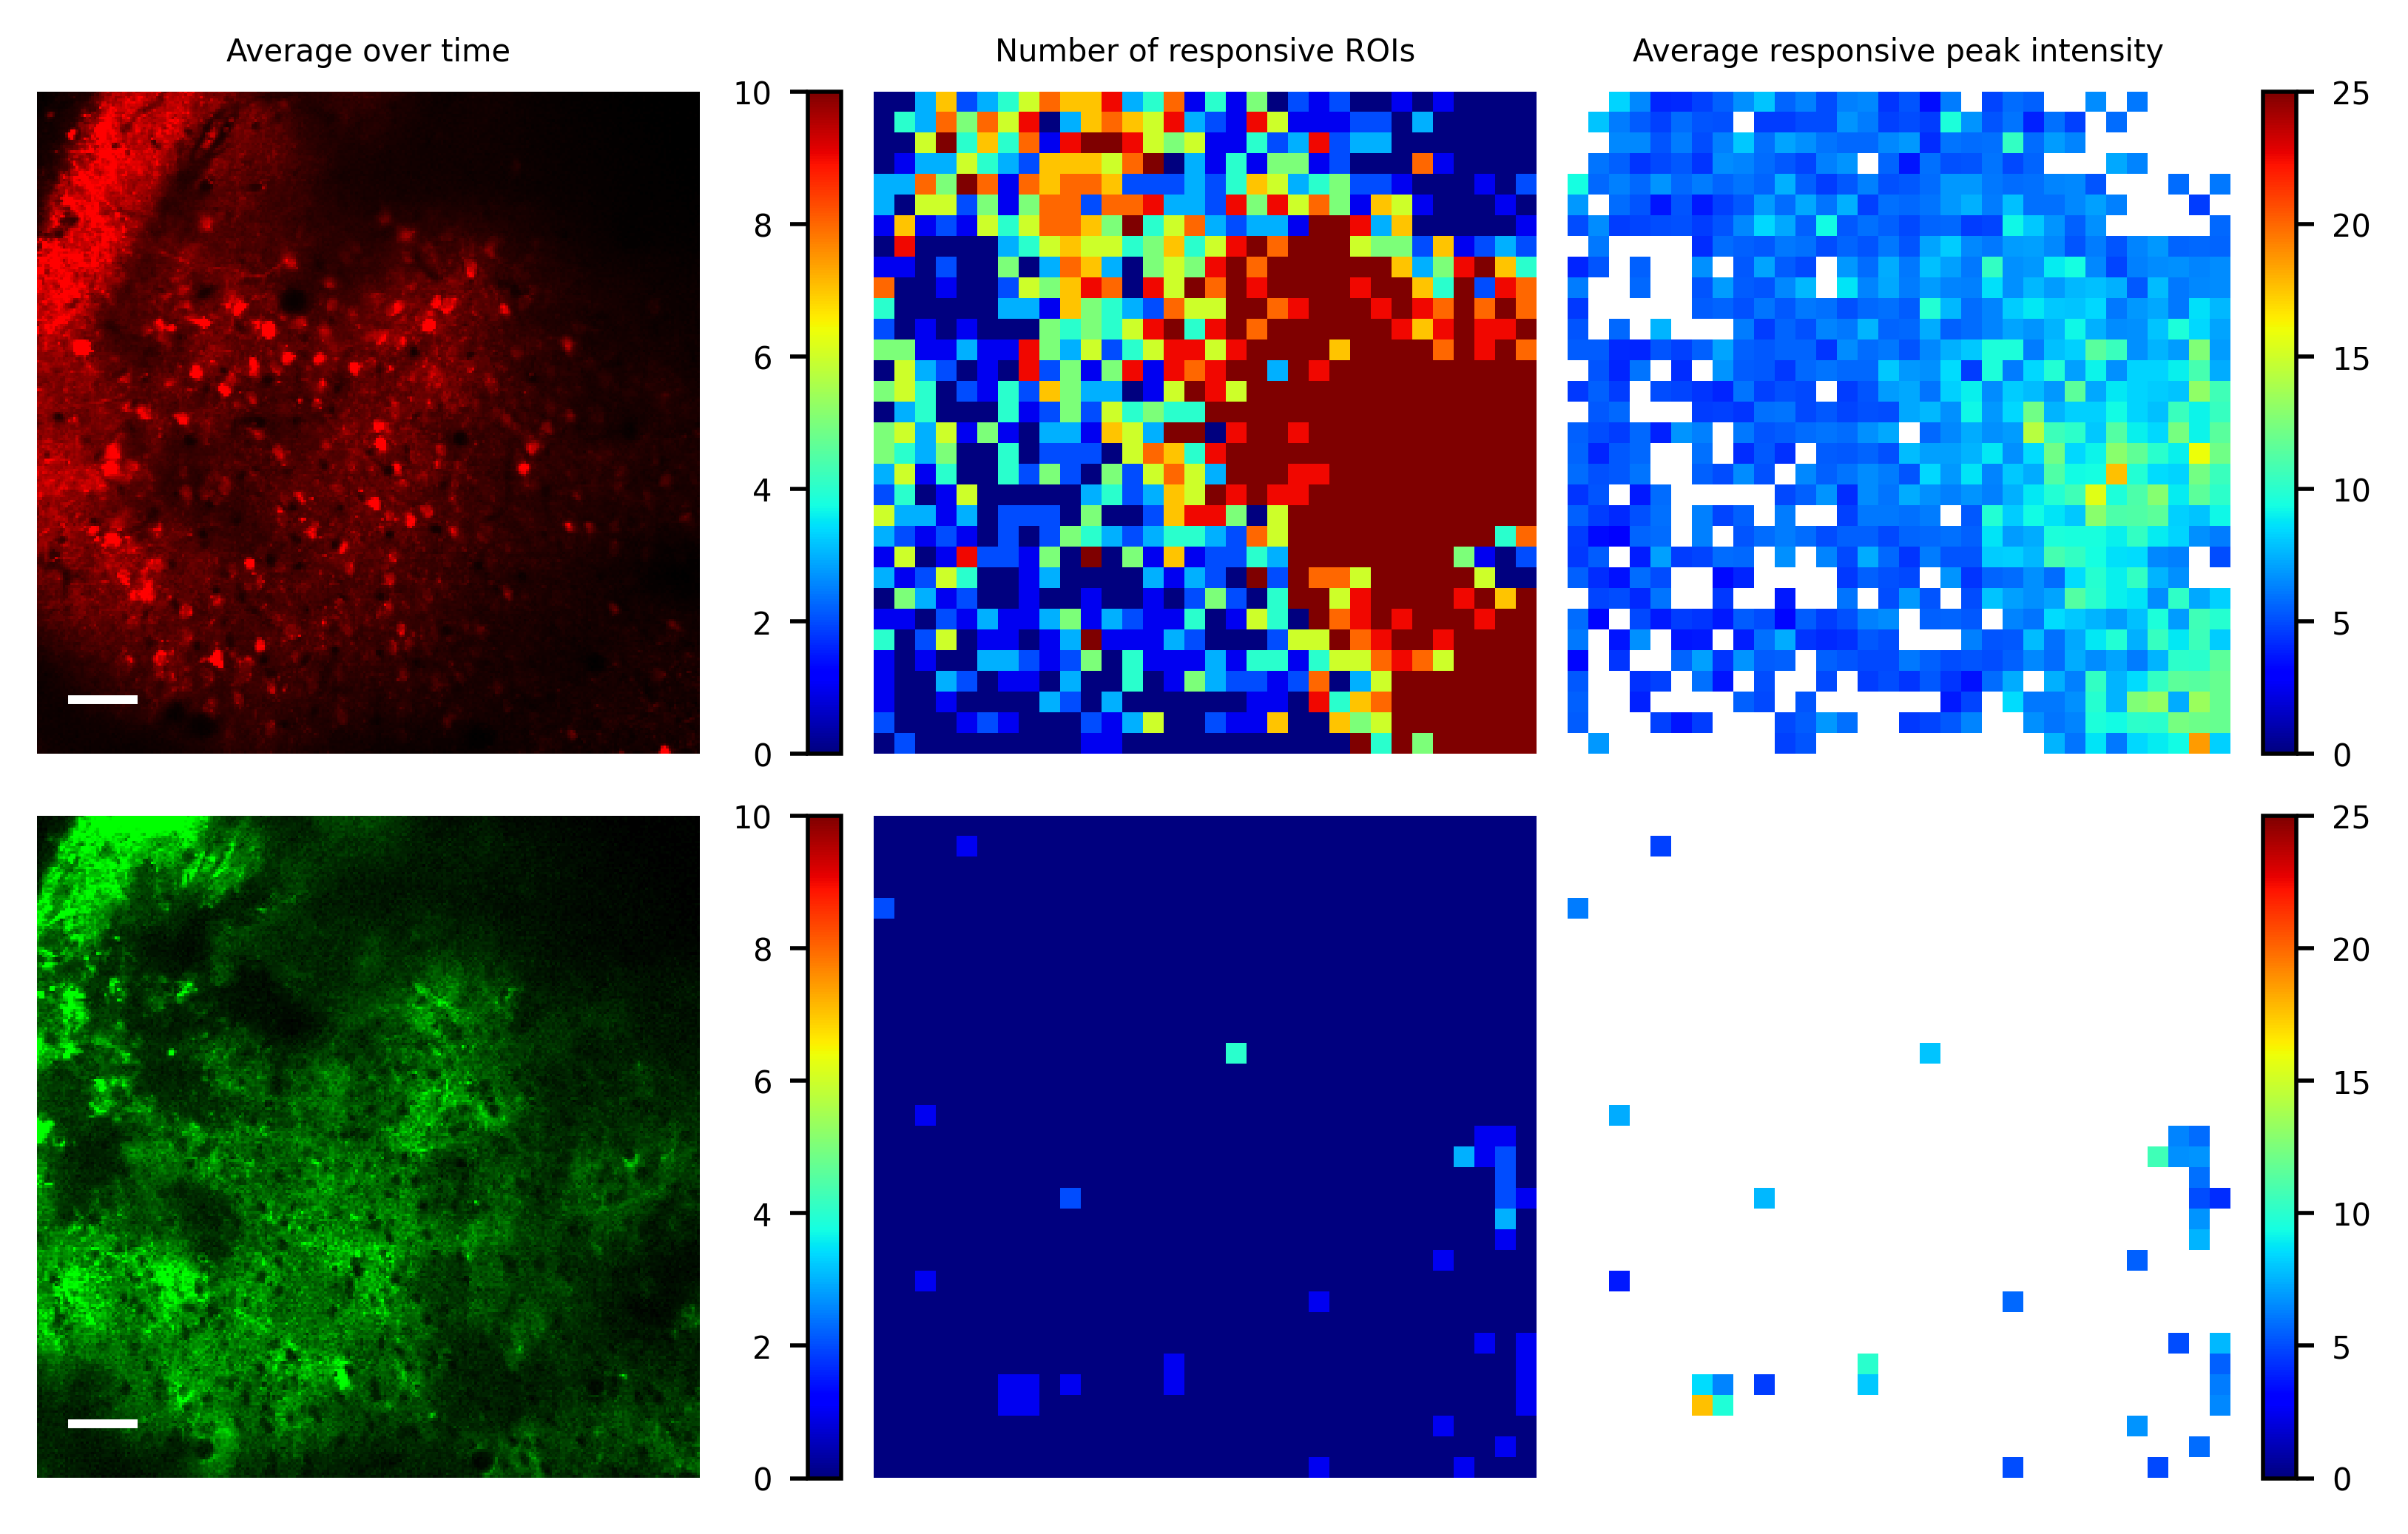

In [30]:
info = input_output.load("/home/s233039/Desktop/KU/data/79/microelectrode_experiments/2_10uA 10 trials.tiff")
roi_activity(info, "Low intensity canvas", 25)

## F

In [16]:
neurons_dict, astro_dict = empty_dicts()
for m_info in input_output.mouse_infos():
    neuro_res, astro_res = signal_processing.get_activity(m_info)
    neuro_res = np.sum(neuro_res, axis = 0)
    astro_res = np.sum(astro_res, axis = 0)
    neurons_hist, _ = np.histogram(neuro_res, bins = np.arange(0, 12))
    astrocytes_hist, _ = np.histogram(astro_res, bins = np.arange(0, 12))
    # neurons_activity still has the ten stimulation in time
    nc = 100*neurons_hist/(np.prod(neuro_res.shape)) 
    ac = 100*astrocytes_hist/(np.prod(neuro_res.shape))
    neurons_dict[m_info['current']].append(nc)
    astro_dict[m_info['current']].append(ac)
keys = sorted([cur for cur in neurons_dict.keys() if cur%10 == 0])

58.830 ± 26.487 (N = 5)
77.054 ± 23.453 (N = 5)
82.389 ± 18.697 (N = 4)
96.730 ± 1.760 (N = 4)
97.846 ± 1.345 (N = 5)
10.476 ± 7.406 (N = 5)
11.265 ± 7.479 (N = 5)
15.033 ± 9.147 (N = 4)
30.590 ± 12.258 (N = 4)
37.460 ± 6.351 (N = 5)


Text(0.02, 0.5, 'Fraction of ROIs in FOV (%)')

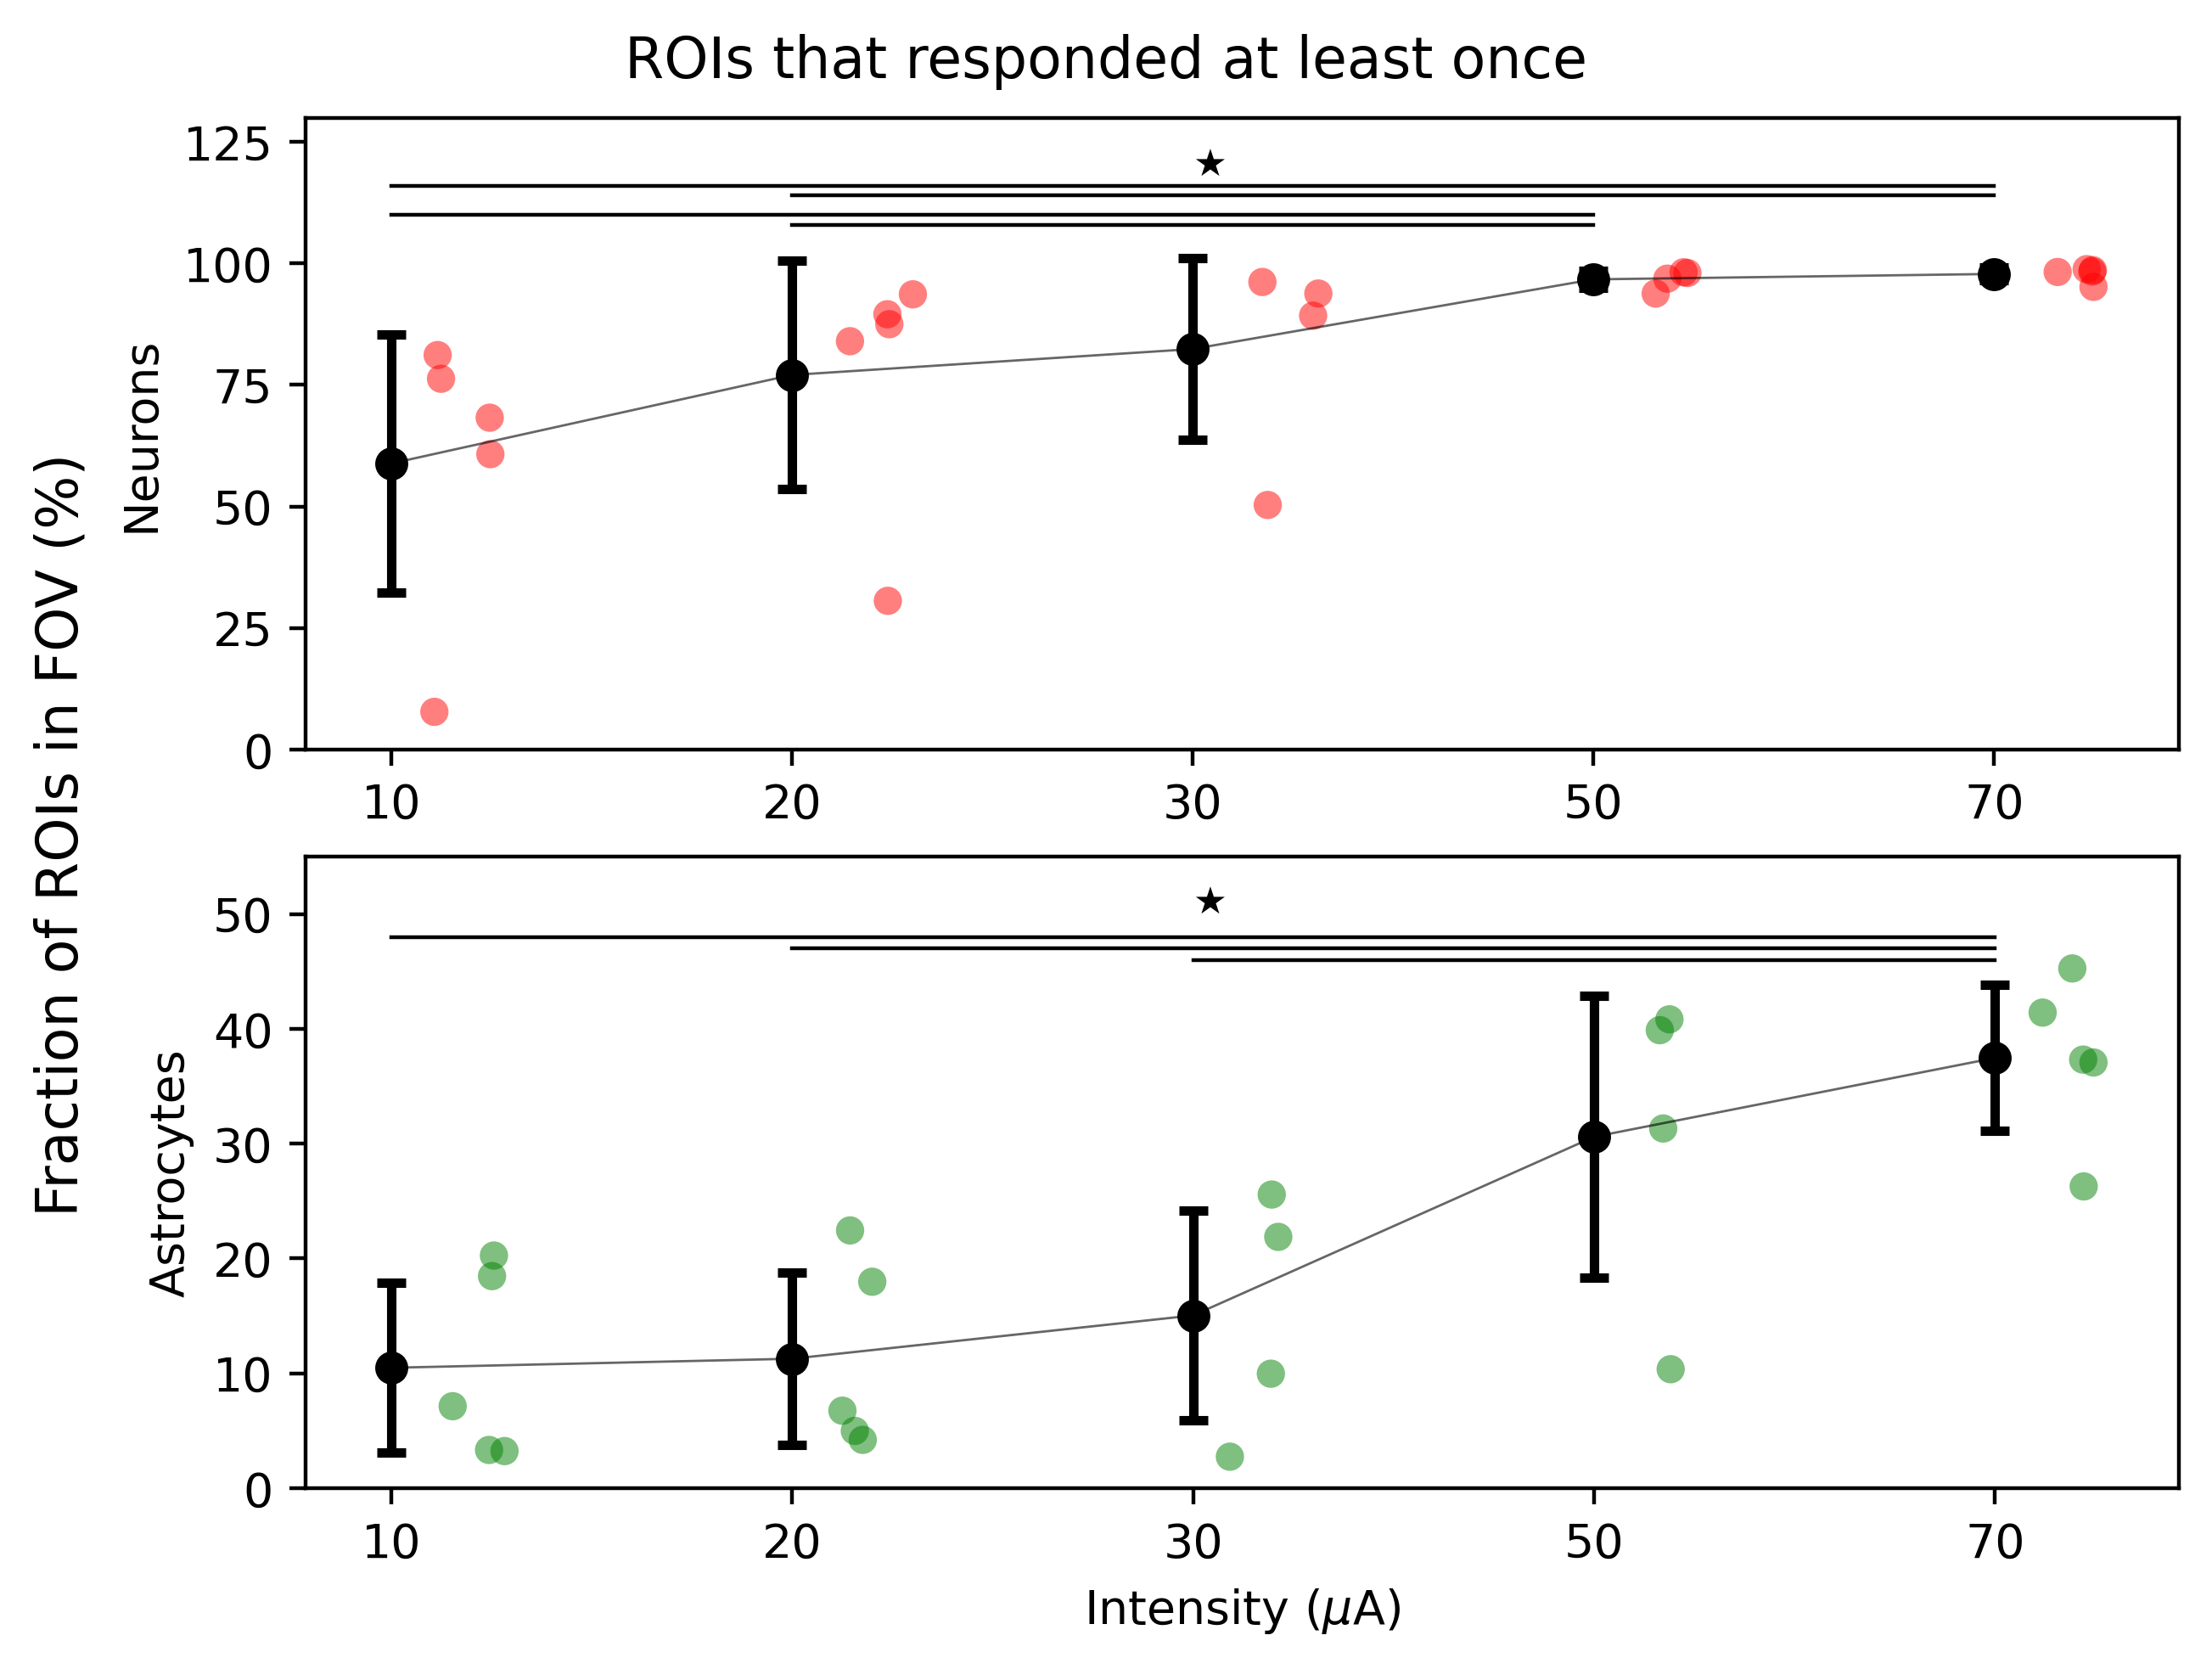

In [17]:
fig, ax = plt.subplots(2, 1, dpi = 400, layout = 'compressed')
neuro_sums, astro_sums = [],[]
x = np.arange(len(keys))
for cell_type, d in enumerate((neurons_dict, astro_dict)):
    color = "red" if cell_type == 0 else "green"
    l = []
    for index, cur in enumerate(keys):
        sums = np.sum(np.array(d[cur])[:, 1:], axis = 1)
        if cell_type == 0:
            neuro_sums.append(sums)
        else:
            astro_sums.append(sums)

        xs = index
        print(f'{np.mean(sums):.3f} \u00B1 {np.std(sums):.3f} (N = {len(sums)})')
        ax[cell_type].errorbar(x = xs, 
                    y = np.mean(sums), 
                    yerr = np.std(sums), 
                    capsize = 3, 
                    fmt = 'o', 
                    color = 'black',
                    capthick=2,
                    linewidth = 2)
        
        ax[cell_type].scatter(
            np.random.normal(index + 0.2,0.05, sums.shape), 
            sums, 
            color = color, 
            alpha = 0.5,
            edgecolors='none')
        l.append(np.mean(sums))
    xs = np.arange(len(keys))
    ax[cell_type].plot(xs, l, color = 'black', linewidth = 0.5, alpha = 0.6, label = "Neurons" if cell_type == 0 else "Astrocytes")
    ax[cell_type].set_xticks(x, list(map(str, keys)))

# transform = mtl.transforms.blended_transform_factory(ax.transData, ax.transData)

ax[0].text(2, 118, "★", fontsize = 8)
ax[0].set_ylim(0, 130)
ax[1].text(2, 50, "★", fontsize = 8)
ax[1].set_ylim(0, 55)
# ax.text(2, -3, "★", fontsize = 8, transform = transform)
# ax.text(1, 10.6, "★", fontsize = 8, transform = transform)

xs = [(0, 4), (1, 4), (0, 3), (1, 3)]
ys = [116, 114, 110, 108]
for x,y in zip(xs, ys):
    ax[0].plot(x, (y,y), color = 'black', linewidth = 0.8)

xs = [(0, 4), (1, 4), (2, 4)]
ys = [48,47, 46]
for x,y in zip(xs, ys):
    ax[1].plot(x, (y,y), color = 'black', linewidth = 0.8)

fig.suptitle("ROIs that responded at least once")
ax[1].set_xlabel(r"Intensity ($\mu$A)")
ax[0].set_ylabel('Neurons')
ax[1].set_ylabel('Astrocytes')
fig.supylabel("Fraction of ROIs in FOV (%)")


In [18]:
scipy.stats.kruskal(*neuro_sums), scipy.stats.kruskal(*astro_sums)

(KruskalResult(statistic=16.90889767671775, pvalue=0.002013333584226294),
 KruskalResult(statistic=13.532608695652172, pvalue=0.008946347527237367))

In [19]:
def compare(l:list, comparing_categories:list):
    p_values = []
    infos = []
    for i in range(len(l)):
        for j in range(i+1, len(l)):
            p_values.append(scipy.stats.mannwhitneyu(l[i], l[j])[1])

            infos.append(f'Comparing {comparing_categories[i]} to {comparing_categories[j]}')
    adjusted_pvalues = scipy.stats.false_discovery_control(p_values)
    for info, ap in zip(infos, adjusted_pvalues):
        print(info)
        print(ap)

In [21]:
compare(neuro_sums, input_output.SHOWCASE_CURRENTS)

Comparing 10 to 20
0.13605442176870747
Comparing 10 to 30
0.21164021164021163
Comparing 10 to 50
0.03968253968253968
Comparing 10 to 70
0.03968253968253968
Comparing 20 to 30
0.4126984126984127
Comparing 20 to 50
0.03968253968253968
Comparing 20 to 70
0.03968253968253968
Comparing 30 to 50
0.13571517059981847
Comparing 30 to 70
0.06349206349206349
Comparing 50 to 70
0.1388888888888889


In [22]:
compare(astro_sums, input_output.SHOWCASE_CURRENTS)

Comparing 10 to 20
0.8412698412698413
Comparing 10 to 30
0.6944444444444444
Comparing 10 to 50
0.12698412698412698
Comparing 10 to 70
0.03968253968253968
Comparing 20 to 30
0.8112874779541447
Comparing 20 to 50
0.12698412698412698
Comparing 20 to 70
0.03968253968253968
Comparing 30 to 50
0.19047619047619047
Comparing 30 to 70
0.05291005291005291
Comparing 50 to 70
0.6944444444444444


## G

In [3]:
def get_distances(shape:tuple, tip_location:tuple, grid_size):
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[2]))
    return np.sqrt((x-tip_location[0]//grid_size)**2 + (y - tip_location[1]//grid_size)**2)

n_dict, a_dict = empty_dicts()
for m_info in input_output.mouse_infos():
    tip_location = m_info['tip_location']
    n_activity, a_activity = signal_processing.get_activity(m_info)
    distances = get_distances(n_activity.shape, tip_location, m_info['grid_size']).flatten()
    distances = distances*input_output.DEFAULT_GRID_SIZE*m_info['x']
    arg_s = np.argsort(distances)
    n_activity = np.sum(n_activity, axis = 0).flatten()
    a_activity = np.sum(a_activity, axis = 0).flatten()
    n_peaks, a_peaks = signal_processing.get_peaks(m_info)
    n_peaks = np.nanmean(n_peaks, axis = 0).flatten()
    a_peaks = np.nanmean(a_peaks, axis = 0).flatten()
    n = np.vstack((distances[arg_s], n_activity[arg_s], n_peaks[arg_s]))
    a = np.vstack((distances[arg_s], a_activity[arg_s], a_peaks[arg_s]))
    n_dict[m_info['current']].append(n)
    a_dict[m_info['current']].append(a)

PearsonRResult(statistic=-0.34190140357871956, pvalue=0.0)
SignificanceResult(statistic=-0.33194164680414956, pvalue=0.0)
PearsonRResult(statistic=-0.043799984933415, pvalue=2.133803513174191e-07)
SignificanceResult(statistic=-0.05053094326535453, pvalue=2.1586665704018995e-09)


Text(0.5, 0.98, 'Low current intensity')

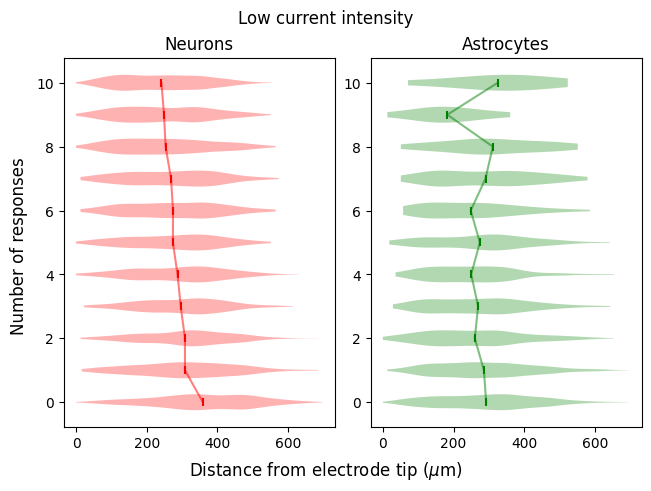

In [4]:

fig, ax = plt.subplots(1, 2, layout = 'compressed')

for index, d in enumerate((n_dict, a_dict)):
    color = 'green' if index else 'red'
    l = np.zeros((3, 0))
    for current_index , current in enumerate(sorted(d.keys(), reverse = True)):
        if current >40:
            continue
        data = np.hstack(d[current])
        l = np.append(l, data, axis =1)
    dataset = [l[0, l[1] == i] for i in range(11)]
    violins = ax[index].violinplot(dataset,np.arange(11), showmeans = True, showextrema = False, vert = False)
    for body in violins['bodies']:
        body.set_facecolor(color)
        violins['cmeans'].set_color(color)
    avgs = [np.mean(set) for set in dataset]
    ax[index].plot(avgs, np.arange(0, 11), color = color, alpha = 0.5)
    print(scipy.stats.pearsonr(l[0, 1:], l[1, 1:]))
    print(scipy.stats.spearmanr(l[0, 1:], l[1, 1:]))
ax[0].set_title('Neurons')
ax[1].set_title('Astrocytes')
fig.supylabel('Number of responses')
fig.supxlabel(r'Distance from electrode tip ($\mu$m)')
fig.suptitle('Low current intensity')

## H

PearsonRResult(statistic=-0.318133669648528, pvalue=1.4291027922796446e-282)
SignificanceResult(statistic=-0.3066755349390151, pvalue=1.010879489917787e-261)
PearsonRResult(statistic=-0.10307774219104215, pvalue=6.223556561556538e-30)
SignificanceResult(statistic=-0.12833431695907468, pvalue=1.384537759359365e-45)


Text(0.5, 0.98, 'High current intensity')

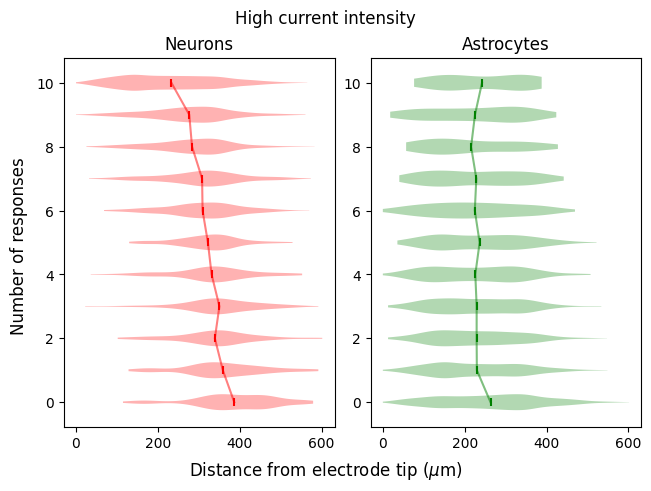

In [5]:
fig, ax = plt.subplots(1, 2, layout = 'compressed')

for index, d in enumerate((n_dict, a_dict)):
    color = 'green' if index else 'red'
    l = np.zeros((3, 0))
    for current_index , current in enumerate(sorted(d.keys(), reverse = True)):
        if current <40:
            continue
        data = np.hstack(d[current])
        l = np.append(l, data, axis =1)
    dataset = [l[0, l[1] == i] for i in range(11)]
    violins = ax[index].violinplot(dataset,np.arange(11), showmeans = True, showextrema = False, vert= False)
    for body in violins['bodies']:
        body.set_facecolor(color)
        # violins['cbars'].set_color(color)
        # violins['cmins'].set_color(color)
        violins['cmeans'].set_color(color)
    avgs = [np.mean(set) for set in dataset]
    ax[index].plot(avgs, np.arange(0, 11), color = color, alpha = 0.5)
    print(scipy.stats.pearsonr(l[0, 1:], l[1, 1:]))
    print(scipy.stats.spearmanr(l[0, 1:], l[1, 1:]))
ax[0].set_title('Neurons')
ax[1].set_title('Astrocytes')
fig.supylabel('Number of responses')
fig.supxlabel(r'Distance from electrode tip ($\mu$m)')
fig.suptitle('High current intensity')


## SMTH

In [5]:
def grid_exmaple(ax,info, cell_type:str,x,y):
    image = nasa.image_processing.get_image(info[cell_type], cell_type)
    # fig, ax = plt.subplots(1, 2, dpi = 500, layout = "compressed")
    ax.imshow(image)

    grid_size = nasa.consts.DEFAULT_GRID_SIZE
    # color = "white"
    # linewidth = 0.2

    # for i, j in nasa.plotting.rois_indices(image.shape, grid_size):
    #     rect = ptch.Rectangle((j*grid_size, i*grid_size), grid_size, grid_size, edgecolor = color, facecolor = 'none', linewidth = linewidth)
    #     ax.add_patch(rect)

    # Zoom rectangle
    rects = 3
    rect = ptch.Rectangle((x*grid_size, y*grid_size), rects*grid_size, rects*grid_size, edgecolor = 'yellow', facecolor = 'none', linewidth = 1)
    ax.add_patch(rect)

    # add_scale(ax[0], info['x'])

    # for a in ax:
    ax.set_axis_off()

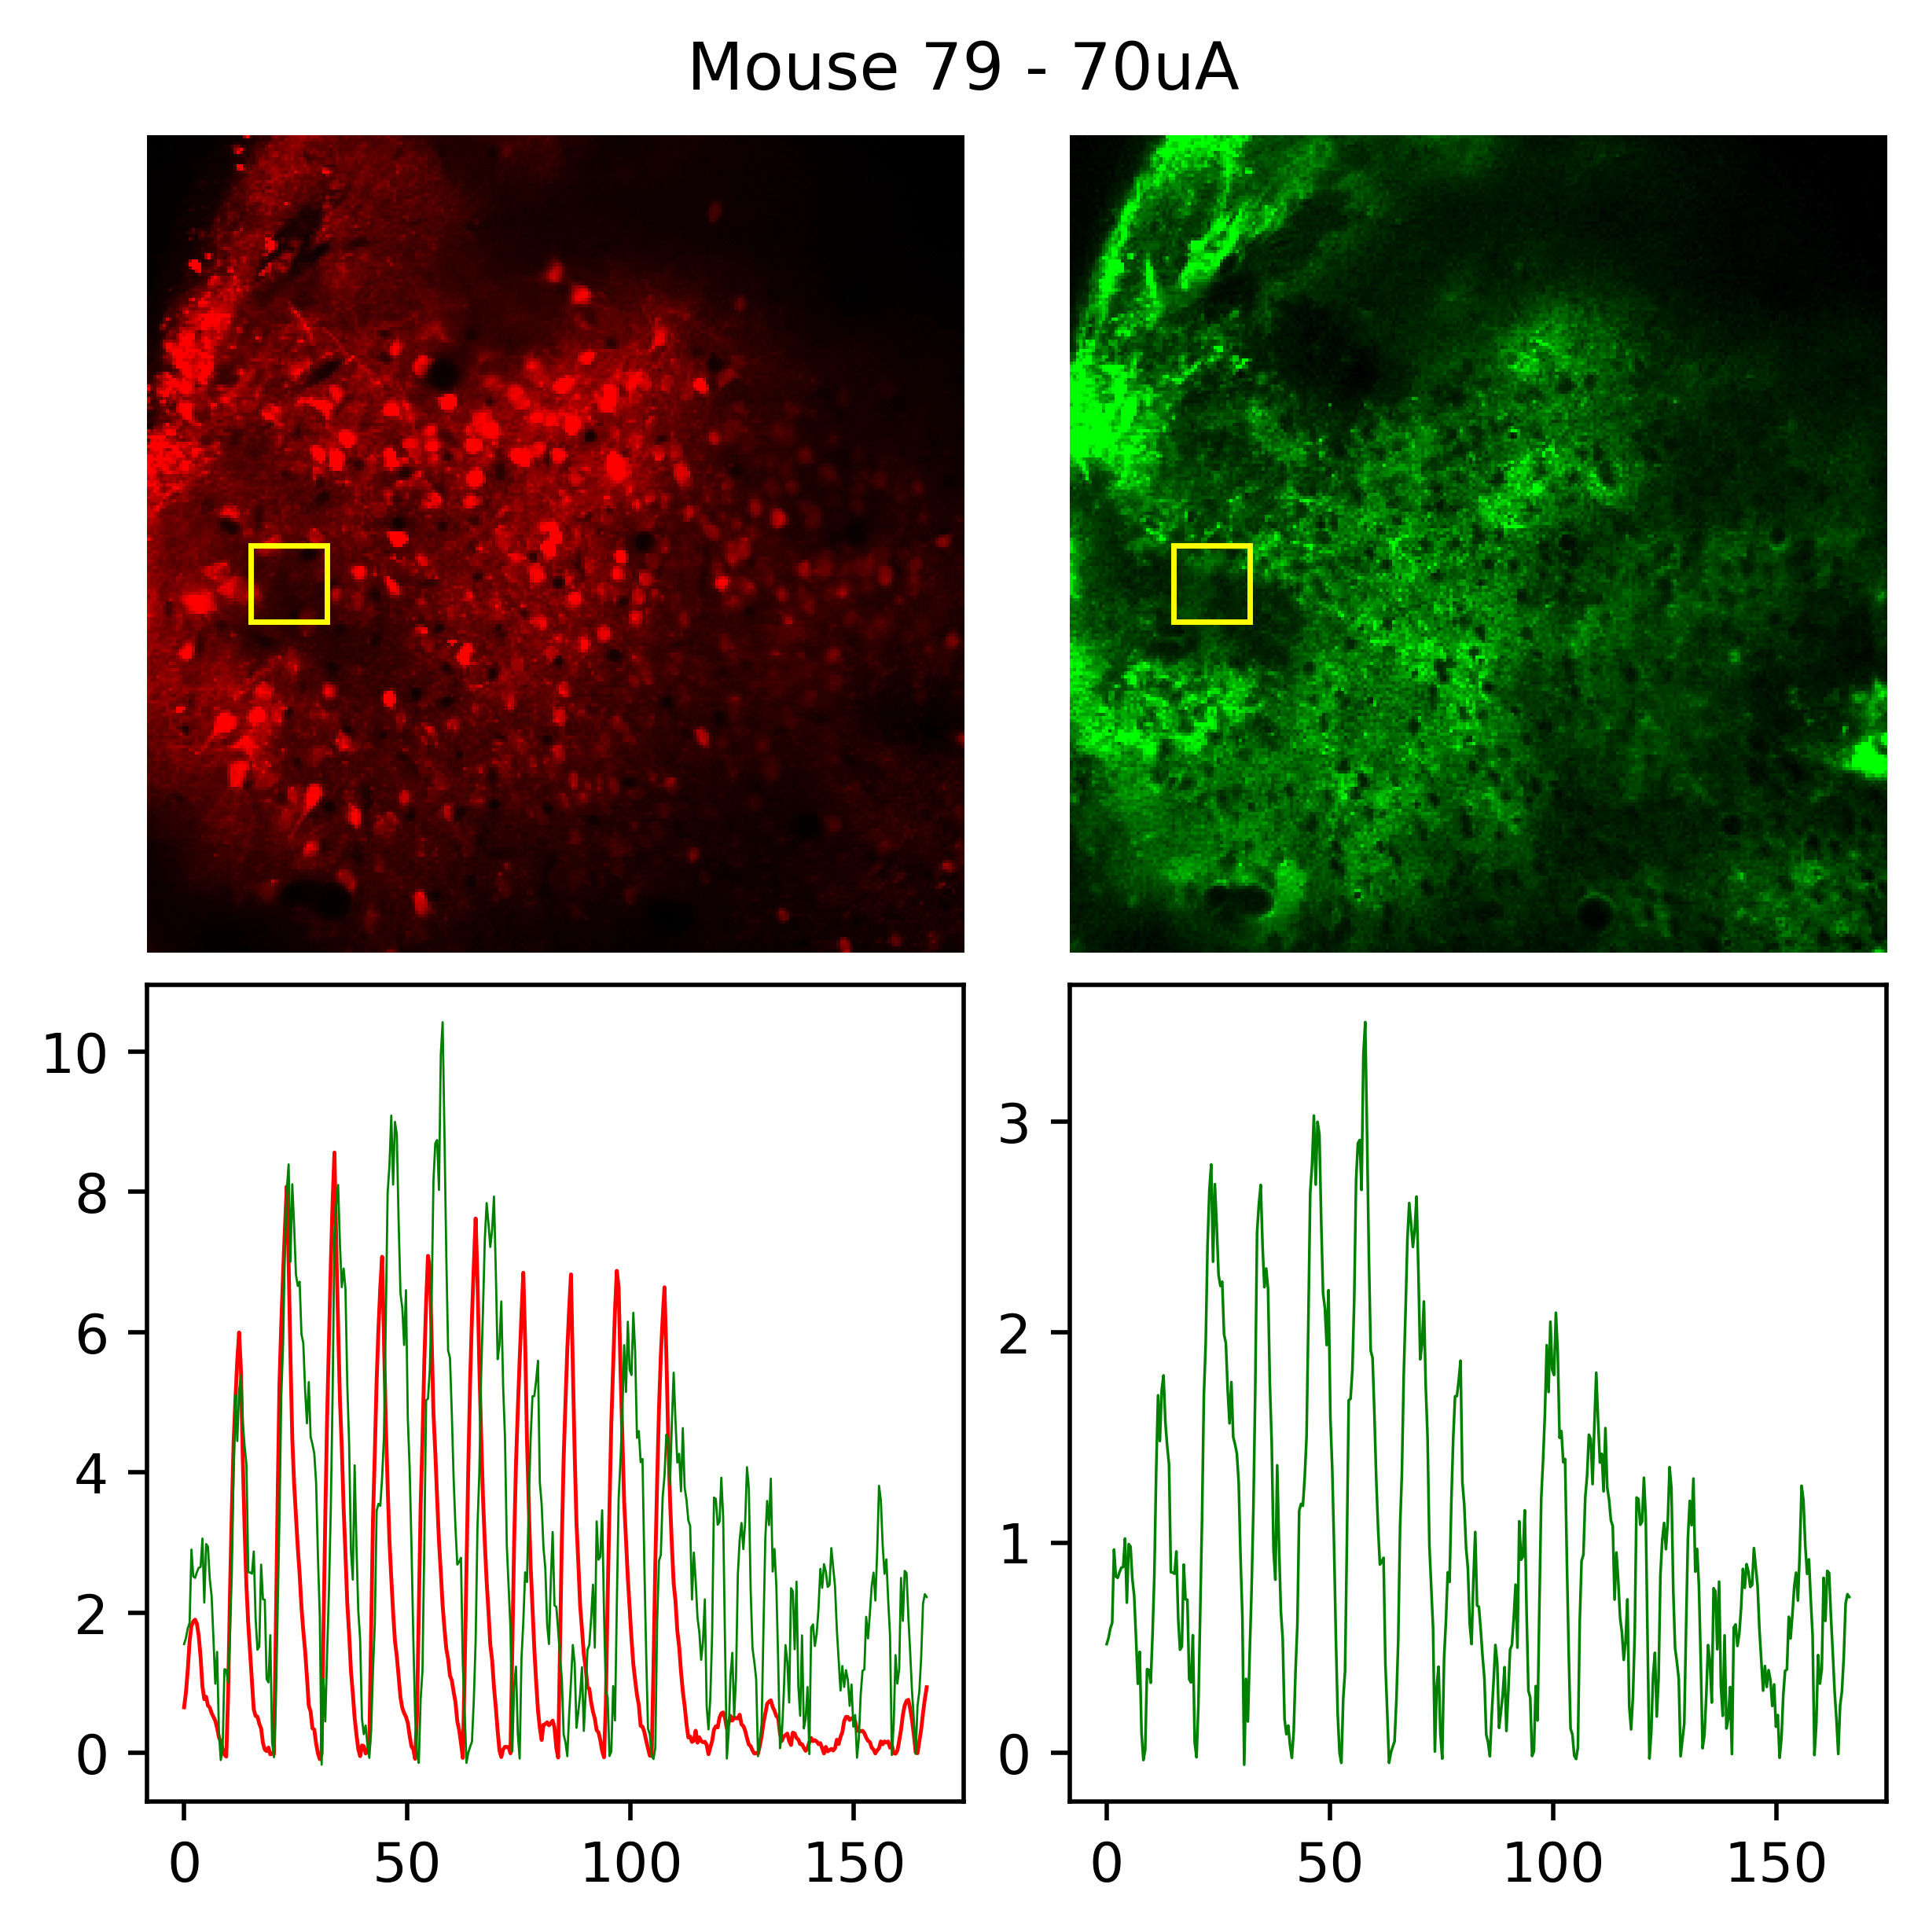

In [ ]:
row, column = 16, 4
#EXAMPLE FILE
#(18, 31)
#(27, 31)
#(29, 31)
#(29, 30)
#(28, 30)

#78 - 8_70:
# 26, 22 - negative astrocytes
# 15, 17 - positive astrocytes
# 17, 17 - neurons going up and down
# 19, 2  - negative neurons -131
# 6, 24 - negative neurons -48
# 0, 0 - amazing to show negative values and missing peaks of astrocytes
region_size = 3
grid_size = nasa.consts.DEFAULT_GRID_SIZE
ss1 = info['stimulations_starts'][0]
# neurons_rois = nasa.input_output.image_to_roi_signals(info['neurons'])
# astrocytes_rois = nasa.input_output.image_to_roi_signals(info['astrocytes'])
n_signal = np.average(info['neurons'][:, row*grid_size:(row+region_size)*grid_size, column*grid_size:(column+region_size)*grid_size], axis=(1,2))
n_signal = (n_signal - np.average(n_signal[:ss1]))/np.std(n_signal[:ss1])
n_mva = nasa.filters.moving_average(n_signal, 7)
n_baseline = nasa.filters.baseline_als(n_mva, 30, 0.001)
a_signal = np.average(info['astrocytes'][:, row*grid_size:(row+region_size)*grid_size, column*grid_size:(column+region_size)*grid_size], axis=(1,2))
a_signal = (a_signal - np.average(a_signal[:ss1]))/np.std(a_signal[:ss1])
a_mva = nasa.filters.moving_average(a_signal, 7)
a_baseline = nasa.filters.baseline_als(a_mva, 30, 0.001)

fig, ax = plt.subplots(2, 2, dpi = 500, layout = "compressed")
x = np.arange(len(n_baseline))/info['fs']
grid_exmaple(ax[0, 0], info, 'neurons', x = column, y = row)
grid_exmaple(ax[0, 1], info, 'astrocytes', x = column, y = row)
ax[1, 0].plot(x,n_mva - n_baseline, color = 'red', linewidth = 0.7)
ax[1, 1].plot(x,a_mva - a_baseline, color = 'green', linewidth = 0.5)
ax[1, 0].plot(x,3*(a_mva - a_baseline), color = 'green', linewidth = 0.4)
fig.suptitle("Mouse 79 - 70uA")
# plotting.save_fig(fig, 2, f"No bleaching example")